# Caricamento del dataset
___

In [286]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from geopandas import GeoDataFrame
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')

print("Imports ok")

Imports ok


In [287]:
# Caricamento dataset
city_attributes = pd.read_csv("~/Desktop/Data_science/Progetto/Python/Python/Dataset python/city_attributes.csv")
humidity = pd.read_csv("~/Desktop/Data_science/Progetto/Python/Python/Dataset python/humidity.csv")
pressure = pd.read_csv("~/Desktop/Data_science/Progetto/Python/Python/Dataset python/pressure.csv")
temperature = pd.read_csv("~/Desktop/Data_science/Progetto/Python/Python/Dataset python/temperature.csv")
wind_direction = pd.read_csv("~/Desktop/Data_science/Progetto/Python/Python/Dataset python/wind_direction.csv")
wind_speed = pd.read_csv("~/Desktop/Data_science/Progetto/Python/Python/Dataset python/wind_speed.csv")
print("Dati caricati")

Dati caricati


In [288]:
city_attributes.head(36)

,City,Country,Latitude,Longitude
0,Vancouver,Canada,49.249660,-123.119339
1,Portland,United States,45.523449,-122.676208
2,San Francisco,United States,37.774929,-122.419418
3,Seattle,United States,47.606209,-122.332069
4,Los Angeles,United States,34.052231,-118.243683
5,San Diego,United States,32.715328,-117.157257
6,Las Vegas,United States,36.174969,-115.137222
7,Phoenix,United States,33.448380,-112.074043
8,Albuquerque,United States,35.084492,-106.651138
9,Denver,United States,39.739151,-104.984703


In [289]:
humidity.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,76.0,81.0,88.0,81.0,88.0,82.0,22.0,23.0,50.0,...,71.0,58.0,93.0,68.0,50.0,63.0,22.0,51.0,51.0,50.0
2,2012-10-01 14:00:00,76.0,80.0,87.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,91.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
3,2012-10-01 15:00:00,76.0,80.0,86.0,80.0,88.0,81.0,21.0,23.0,49.0,...,70.0,57.0,87.0,68.0,51.0,62.0,22.0,51.0,51.0,50.0
4,2012-10-01 16:00:00,77.0,80.0,85.0,79.0,88.0,81.0,21.0,23.0,49.0,...,69.0,57.0,84.0,68.0,52.0,62.0,22.0,51.0,51.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
pressure.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2,2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
3,2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
4,2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,1031.0,NaN,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,...,1021.0,NaN,1021.0,1017.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,1030.0,NaN,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,...,1021.0,NaN,1023.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,1030.0,NaN,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,...,1022.0,NaN,1024.0,1019.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,1029.0,NaN,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,...,1023.0,NaN,1026.0,1022.0,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
temperature.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,309.100000,NaN,NaN,NaN
1,2012-10-01 13:00:00,284.630000,282.080000,289.480000,281.800000,291.870000,291.530000,293.410000,296.600000,285.120000,...,285.630000,288.220000,285.830000,287.170000,307.590000,305.470000,310.580000,304.4,304.4,303.5
2,2012-10-01 14:00:00,284.629041,282.083252,289.474993,281.797217,291.868186,291.533501,293.403141,296.608509,285.154558,...,285.663208,288.247676,285.834650,287.186092,307.590000,304.310000,310.495769,304.4,304.4,303.5
3,2012-10-01 15:00:00,284.626998,282.091866,289.460618,281.789833,291.862844,291.543355,293.392177,296.631487,285.233952,...,285.756824,288.326940,285.847790,287.231672,307.391513,304.281841,310.411538,304.4,304.4,303.5
4,2012-10-01 16:00:00,284.624955,282.100481,289.446243,281.782449,291.857503,291.553209,293.381213,296.654466,285.313345,...,285.850440,288.406203,285.860929,287.277251,307.145200,304.238015,310.327308,304.4,304.4,303.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,282.000000,NaN,280.820000,293.550000,292.150000,289.540000,294.710000,285.720000,...,290.240000,NaN,275.130000,288.080000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,282.890000,NaN,281.650000,295.680000,292.740000,290.610000,295.590000,286.450000,...,289.240000,NaN,274.130000,286.020000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,283.390000,NaN,282.750000,295.960000,292.580000,291.340000,296.250000,286.440000,...,286.780000,NaN,273.480000,283.940000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,283.020000,NaN,282.960000,295.650000,292.610000,292.150000,297.150000,286.140000,...,284.570000,NaN,272.480000,282.170000,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
wind_direction.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,150.0,0.0,0.0,0.0,0.0,10.0,360.0,...,270.0,260.0,230.0,60.0,135.0,101.0,30.0,336.0,336.0,329.0
2,2012-10-01 14:00:00,6.0,4.0,147.0,2.0,0.0,0.0,8.0,9.0,360.0,...,270.0,260.0,230.0,60.0,157.0,315.0,30.0,336.0,336.0,329.0
3,2012-10-01 15:00:00,20.0,18.0,141.0,10.0,0.0,0.0,23.0,9.0,360.0,...,271.0,260.0,231.0,60.0,157.0,307.0,30.0,336.0,336.0,329.0
4,2012-10-01 16:00:00,34.0,31.0,135.0,17.0,0.0,0.0,37.0,9.0,360.0,...,272.0,260.0,233.0,60.0,157.0,294.0,30.0,336.0,336.0,329.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,50.0,NaN,190.0,19.0,240.0,58.0,350.0,217.0,...,290.0,NaN,300.0,290.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,330.0,NaN,130.0,19.0,220.0,58.0,179.0,217.0,...,290.0,NaN,300.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,290.0,NaN,210.0,19.0,220.0,58.0,130.0,190.0,...,320.0,NaN,290.0,340.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,290.0,NaN,210.0,200.0,0.0,44.0,320.0,200.0,...,330.0,NaN,290.0,330.0,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
wind_speed.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,1.0,0.0,8.0,2.0,2.0,2.0
2,2012-10-01 14:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,4.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
3,2012-10-01 15:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
4,2012-10-01 16:00:00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,4.0,...,3.0,7.0,4.0,3.0,3.0,0.0,8.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,2.0,NaN,4.0,1.0,2.0,1.0,3.0,1.0,...,5.0,NaN,10.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,1.0,NaN,5.0,1.0,1.0,1.0,1.0,1.0,...,5.0,NaN,7.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,1.0,NaN,5.0,1.0,2.0,1.0,2.0,1.0,...,3.0,NaN,7.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,2.0,NaN,3.0,2.0,2.0,0.0,3.0,1.0,...,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


# ETL
___

In [294]:
# Definizione funzioni per ETL

# Temperatura da °K a °C
def K_to_C(x):
    if isinstance(x, float):
        x=x-273.15
    return x

# Velocità da m7s a km7h
def ms_to_kmh(x):
    if isinstance(x, float):
        x=x*3.6
    return x

# Arrotondamento alla terza cifra decimale
def round_to_3(x):
    if isinstance(x, float):
        x=round(x, 3)
    return x

In [295]:
# Temperatura in °C
temperature = temperature.applymap(lambda x: K_to_C(x))
temperature.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.950000,NaN,NaN,NaN
1,2012-10-01 13:00:00,11.480000,8.930000,16.330000,8.650000,18.720000,18.380000,20.260000,23.450000,11.970000,...,12.480000,15.070000,12.680000,14.020000,34.440000,32.320000,37.430000,31.25,31.25,30.35
2,2012-10-01 14:00:00,11.479041,8.933252,16.324993,8.647217,18.718186,18.383501,20.253141,23.458509,12.004558,...,12.513208,15.097676,12.684650,14.036092,34.440000,31.160000,37.345769,31.25,31.25,30.35
3,2012-10-01 15:00:00,11.476998,8.941866,16.310618,8.639833,18.712844,18.393355,20.242177,23.481487,12.083952,...,12.606824,15.176940,12.697790,14.081672,34.241513,31.131841,37.261538,31.25,31.25,30.35
4,2012-10-01 16:00:00,11.474955,8.950481,16.296243,8.632449,18.707503,18.403209,20.231213,23.504466,12.163345,...,12.700440,15.256203,12.710929,14.127251,33.995200,31.088015,37.177308,31.25,31.25,30.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,8.850000,NaN,7.670000,20.400000,19.000000,16.390000,21.560000,12.570000,...,17.090000,NaN,1.980000,14.930000,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,9.740000,NaN,8.500000,22.530000,19.590000,17.460000,22.440000,13.300000,...,16.090000,NaN,0.980000,12.870000,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,10.240000,NaN,9.600000,22.810000,19.430000,18.190000,23.100000,13.290000,...,13.630000,NaN,0.330000,10.790000,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,9.870000,NaN,9.810000,22.500000,19.460000,19.000000,24.000000,12.990000,...,11.420000,NaN,-0.670000,9.020000,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
# Velocità del vento in km/h
wind_speed = wind_speed.applymap(lambda x: ms_to_kmh(x))
wind_speed.head(45253)

,datetime,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
0,2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,28.8,NaN,NaN,NaN
1,2012-10-01 13:00:00,0.0,0.0,7.2,0.0,0.0,0.0,0.0,7.2,14.4,...,14.4,25.2,14.4,10.8,3.6,0.0,28.8,7.2,7.2,7.2
2,2012-10-01 14:00:00,0.0,0.0,7.2,0.0,0.0,0.0,0.0,7.2,14.4,...,14.4,25.2,14.4,10.8,10.8,0.0,28.8,7.2,7.2,7.2
3,2012-10-01 15:00:00,0.0,0.0,7.2,0.0,0.0,0.0,0.0,7.2,14.4,...,10.8,25.2,14.4,10.8,10.8,0.0,28.8,7.2,7.2,7.2
4,2012-10-01 16:00:00,0.0,0.0,7.2,0.0,0.0,0.0,0.0,7.2,14.4,...,10.8,25.2,14.4,10.8,10.8,0.0,28.8,7.2,7.2,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45248,2017-11-29 20:00:00,NaN,7.2,NaN,14.4,3.6,7.2,3.6,10.8,3.6,...,18.0,NaN,36.0,28.8,NaN,NaN,NaN,NaN,NaN,NaN
45249,2017-11-29 21:00:00,NaN,3.6,NaN,18.0,3.6,3.6,3.6,3.6,3.6,...,18.0,NaN,25.2,21.6,NaN,NaN,NaN,NaN,NaN,NaN
45250,2017-11-29 22:00:00,NaN,3.6,NaN,18.0,3.6,7.2,3.6,7.2,3.6,...,10.8,NaN,25.2,25.2,NaN,NaN,NaN,NaN,NaN,NaN
45251,2017-11-29 23:00:00,NaN,7.2,NaN,10.8,7.2,7.2,0.0,10.8,3.6,...,10.8,NaN,14.4,7.2,NaN,NaN,NaN,NaN,NaN,NaN


In [297]:
# Creazione variabili di utilizzo
cities = city_attributes['City'].values

city_attributes = city_attributes.set_index('City')

humidity_h = humidity
humidity_d = humidity
humidity_m = humidity
#humidity_y = humidity

pressure_h = pressure
pressure_d = pressure
pressure_m = pressure
#pressure_y = pressure

temperature_h = temperature
temperature_d = temperature
temperature_m = temperature
#temperature_y = temperature

wind_direction_h = wind_direction
wind_direction_d = wind_direction
wind_direction_m = wind_direction
#wind_direction_y = wind_direction

wind_speed_h = wind_speed
wind_speed_d = wind_speed
wind_speed_m = wind_speed
#wind_speed_y = wind_speed

city_attributes.head(36)

,Country,Latitude,Longitude
City,,,
Vancouver,Canada,49.249660,-123.119339
Portland,United States,45.523449,-122.676208
San Francisco,United States,37.774929,-122.419418
Seattle,United States,47.606209,-122.332069
Los Angeles,United States,34.052231,-118.243683
San Diego,United States,32.715328,-117.157257
Las Vegas,United States,36.174969,-115.137222
Phoenix,United States,33.448380,-112.074043
Albuquerque,United States,35.084492,-106.651138


In [298]:
# Trasposizione tabelle per ore
hours = humidity_h['datetime'].values

humidity_h['datetime'] = pd.DatetimeIndex(humidity_h.datetime)
humidity_h = humidity_h.reset_index().groupby(pd.Grouper(key='datetime', freq='h'))[cities].mean()
humidity_h = humidity_h.transpose()
humidity_h = humidity_h.applymap(lambda x: round_to_3(x))

pressure_h['datetime'] = pd.DatetimeIndex(pressure_h.datetime)
pressure_h = pressure_h.reset_index().groupby(pd.Grouper(key='datetime', freq='h'))[cities].mean()
pressure_h = pressure_h.transpose()
pressure_h = pressure_h.applymap(lambda x: round_to_3(x))

temperature_h['datetime'] = pd.DatetimeIndex(temperature_h.datetime)
temperature_h = temperature_h.reset_index().groupby(pd.Grouper(key='datetime', freq='h'))[cities].mean()
temperature_h = temperature_h.transpose()
temperature_h = temperature_h.applymap(lambda x: round_to_3(x))

wind_direction_h['datetime'] = pd.DatetimeIndex(wind_direction_h.datetime)
wind_direction_h = wind_direction_h.reset_index().groupby(pd.Grouper(key='datetime', freq='h'))[cities].mean()
wind_direction_h = wind_direction_h.transpose()
wind_direction_h = wind_direction_h.applymap(lambda x: round_to_3(x))

wind_speed_h['datetime'] = pd.DatetimeIndex(wind_speed_h.datetime)
wind_speed_h = wind_speed_h.reset_index().groupby(pd.Grouper(key='datetime', freq='h'))[cities].mean()
wind_speed_h = wind_speed_h.transpose()
wind_speed_h = wind_speed_h.applymap(lambda x: round_to_3(x))

temperature_h.head(36)

datetime,2012-10-01 12:00:00,2012-10-01 13:00:00,2012-10-01 14:00:00,2012-10-01 15:00:00,2012-10-01 16:00:00,2012-10-01 17:00:00,2012-10-01 18:00:00,2012-10-01 19:00:00,2012-10-01 20:00:00,2012-10-01 21:00:00,...,2017-11-29 15:00:00,2017-11-29 16:00:00,2017-11-29 17:00:00,2017-11-29 18:00:00,2017-11-29 19:00:00,2017-11-29 20:00:00,2017-11-29 21:00:00,2017-11-29 22:00:00,2017-11-29 23:00:00,2017-11-30 00:00:00
Vancouver,NaN,11.48,11.479,11.477,11.475,11.473,11.471,11.469,11.467,11.465,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Portland,NaN,8.93,8.933,8.942,8.950,8.959,8.968,8.976,8.985,8.994,...,5.25,5.50,6.12,7.29,8.37,8.85,9.74,10.24,9.87,9.13
San Francisco,NaN,16.33,16.325,16.311,16.296,16.282,16.267,16.253,16.239,16.224,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seattle,NaN,8.65,8.647,8.640,8.632,8.625,8.618,8.610,8.603,8.596,...,5.08,5.51,5.09,5.38,6.88,7.67,8.50,9.60,9.81,9.89
Los Angeles,NaN,18.72,18.718,18.713,18.708,18.702,18.697,18.691,18.686,18.681,...,10.06,9.78,12.49,15.87,18.88,20.40,22.53,22.81,22.50,21.78
San Diego,NaN,18.38,18.384,18.393,18.403,18.413,18.423,18.433,18.443,18.452,...,12.13,12.60,14.45,16.49,17.78,19.00,19.59,19.43,19.46,18.25
Las Vegas,NaN,20.26,20.253,20.242,20.231,20.220,20.209,20.198,20.187,20.176,...,8.40,7.82,9.81,12.20,14.37,16.39,17.46,18.19,19.00,18.49
Phoenix,NaN,23.45,23.459,23.481,23.504,23.527,23.550,23.573,23.596,23.619,...,12.89,13.49,15.24,17.77,20.00,21.56,22.44,23.10,24.00,24.00
Albuquerque,NaN,11.97,12.005,12.084,12.163,12.243,12.322,12.402,12.481,12.560,...,-1.88,2.21,5.49,7.76,10.06,12.57,13.30,13.29,12.99,11.55
Denver,NaN,11.46,11.457,11.450,11.443,11.435,11.428,11.420,11.413,11.406,...,0.62,1.92,3.61,10.01,13.57,16.41,17.55,16.56,16.02,12.03


In [299]:
# Trasposizione tabelle per giorni
humidity_d['datetime'] = pd.DatetimeIndex(humidity_d.datetime)
humidity_d = humidity_d.reset_index().groupby(pd.Grouper(key='datetime', freq='d'))[cities].mean()
time = humidity_d
time = time.reset_index()
days = time['datetime'].values
humidity_d= humidity_d.transpose()
humidity_d = humidity_d.applymap(lambda x: round_to_3(x))

pressure_d['datetime'] = pd.DatetimeIndex(pressure_d.datetime)
pressure_d = pressure_d.reset_index().groupby(pd.Grouper(key='datetime', freq='d'))[cities].mean()
pressure_d = pressure_d.transpose()
pressure_d = pressure_d.applymap(lambda x: round_to_3(x))

temperature_d['datetime'] = pd.DatetimeIndex(temperature_d.datetime)
temperature_d = temperature_d.reset_index().groupby(pd.Grouper(key='datetime', freq='d'))[cities].mean()
temperature_d = temperature_d.transpose()
temperature_d = temperature_d.applymap(lambda x: round_to_3(x))

wind_direction_d['datetime'] = pd.DatetimeIndex(wind_direction_d.datetime)
wind_direction_d = wind_direction_d.reset_index().groupby(pd.Grouper(key='datetime', freq='d'))[cities].mean()
wind_direction_d = wind_direction_d.transpose()
wind_direction_d = wind_direction_d.applymap(lambda x: round_to_3(x))

wind_speed_d['datetime'] = pd.DatetimeIndex(wind_speed_d.datetime)
wind_speed_d = wind_speed_d.reset_index().groupby(pd.Grouper(key='datetime', freq='d'))[cities].mean()
wind_speed_d = wind_speed_d.transpose()
wind_speed_d = wind_speed_d.applymap(lambda x: round_to_3(x))

temperature_d.head(36)

datetime,2012-10-01,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,...,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,2017-11-26,2017-11-27,2017-11-28,2017-11-29,2017-11-30
Vancouver,11.471,12.995,12.378,11.223,10.607,11.676,12.446,12.793,12.807,11.764,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Portland,8.968,12.988,16.450,13.333,15.136,15.141,15.113,15.337,12.043,11.214,...,8.727,12.298,15.237,9.394,6.143,8.438,6.773,6.936,6.711,9.13
San Francisco,16.267,19.808,23.779,22.537,17.485,16.860,16.424,15.360,15.200,15.356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seattle,8.617,12.007,14.524,11.242,11.606,12.525,13.033,13.994,13.558,12.811,...,5.443,14.676,14.383,8.927,7.844,9.427,6.704,6.944,6.123,9.89
Los Angeles,18.697,22.740,25.859,22.848,19.798,19.219,19.779,20.769,19.290,18.193,...,18.980,22.378,23.589,21.030,19.877,17.274,16.215,14.363,16.077,21.78
San Diego,18.423,22.141,24.729,22.931,20.744,19.665,19.232,20.542,20.202,19.621,...,17.679,21.113,23.068,20.704,17.689,14.468,15.876,12.611,15.129,18.25
Las Vegas,20.209,24.098,27.542,28.670,27.479,26.001,25.441,23.361,22.425,25.007,...,12.835,16.373,17.289,16.748,16.295,16.560,18.240,13.345,11.725,18.49
Phoenix,23.552,28.062,29.717,29.083,28.661,26.660,26.098,26.382,25.876,26.064,...,16.933,19.481,20.792,19.884,19.870,19.731,19.065,17.134,16.857,24.00
Albuquerque,12.326,16.622,18.055,19.946,19.679,19.735,15.615,8.838,11.432,15.247,...,9.602,7.499,8.357,8.565,9.415,9.061,8.176,10.102,4.496,11.55
Denver,11.427,13.079,15.598,18.443,7.559,2.567,1.011,2.573,8.567,9.114,...,8.722,6.658,11.749,15.359,7.817,9.319,15.754,6.686,4.247,12.03


In [300]:
# Trasposizione tabelle per mesi
humidity_m['datetime'] = pd.DatetimeIndex(humidity_m.datetime)
humidity_m = humidity_m.reset_index().groupby(pd.Grouper(key='datetime', freq='m'))[cities].mean()
time = humidity_m
time = time.reset_index()
months = time['datetime'].values
humidity_m= humidity_m.transpose()
humidity_m = humidity_m.applymap(lambda x: round_to_3(x))

pressure_m['datetime'] = pd.DatetimeIndex(pressure_m.datetime)
pressure_m = pressure_m.reset_index().groupby(pd.Grouper(key='datetime', freq='m'))[cities].mean()
pressure_m = pressure_m.transpose()
pressure_m = pressure_m.applymap(lambda x: round_to_3(x))

temperature_m['datetime'] = pd.DatetimeIndex(temperature_m.datetime)
temperature_m = temperature_m.reset_index().groupby(pd.Grouper(key='datetime', freq='m'))[cities].mean()
temperature_m = temperature_m.transpose()
temperature_m = temperature_m.applymap(lambda x: round_to_3(x))

wind_direction_m['datetime'] = pd.DatetimeIndex(wind_direction_m.datetime)
wind_direction_m = wind_direction_m.reset_index().groupby(pd.Grouper(key='datetime', freq='m'))[cities].mean()
wind_direction_m = wind_direction_m.transpose()
wind_direction_m = wind_direction_m.applymap(lambda x: round_to_3(x))

wind_speed_m['datetime'] = pd.DatetimeIndex(wind_speed_m.datetime)
wind_speed_m = wind_speed_m.reset_index().groupby(pd.Grouper(key='datetime', freq='m'))[cities].mean()
wind_speed_m = wind_speed_m.transpose()
wind_speed_m = wind_speed_m.applymap(lambda x: round_to_3(x))

temperature_m.head(36)

datetime,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,...,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30
Vancouver,10.144,7.243,4.438,1.885,5.139,6.690,9.418,13.228,15.752,19.155,...,2.424,6.075,9.427,12.543,15.576,18.255,18.978,16.182,10.272,NaN
Portland,12.061,8.611,5.406,2.001,5.821,8.053,10.957,13.939,16.557,19.347,...,4.701,8.628,10.204,14.866,17.696,20.045,21.932,18.396,11.583,8.300
San Francisco,16.467,13.443,10.253,8.245,10.049,12.079,14.572,16.228,17.494,18.605,...,11.837,13.645,15.111,17.006,19.602,20.183,19.189,20.670,17.083,NaN
Seattle,11.180,7.862,5.165,2.824,6.010,7.260,9.423,13.385,16.086,18.578,...,4.173,7.243,9.515,13.382,16.088,18.354,19.956,16.830,10.348,7.462
Los Angeles,20.105,16.126,13.089,11.593,12.584,15.066,16.484,19.002,19.903,22.089,...,12.706,16.389,17.873,18.269,21.119,23.801,23.646,22.741,21.678,17.832
San Diego,19.670,15.861,12.988,11.530,12.097,14.362,15.285,17.795,18.460,20.649,...,12.928,15.347,16.874,17.271,19.175,22.191,21.913,21.820,20.579,16.910
Las Vegas,20.882,14.379,9.014,5.932,9.665,16.678,20.456,25.194,31.955,33.379,...,11.101,17.124,19.595,24.075,32.057,34.103,32.218,26.823,20.803,15.720
Phoenix,24.385,18.633,11.874,9.645,11.814,18.457,22.212,27.435,32.992,33.830,...,14.448,19.775,22.663,26.509,33.524,33.968,33.424,29.602,25.395,19.813
Albuquerque,13.970,7.450,1.394,-1.339,2.157,8.900,13.150,17.271,24.301,21.098,...,6.043,11.830,13.285,17.537,24.768,25.145,22.709,20.226,13.547,9.796
Denver,9.741,7.203,0.343,-1.240,-0.354,3.286,5.723,14.003,20.372,20.879,...,3.984,9.308,9.764,13.204,20.901,23.428,20.375,17.204,9.593,7.153


# Data visualization
___

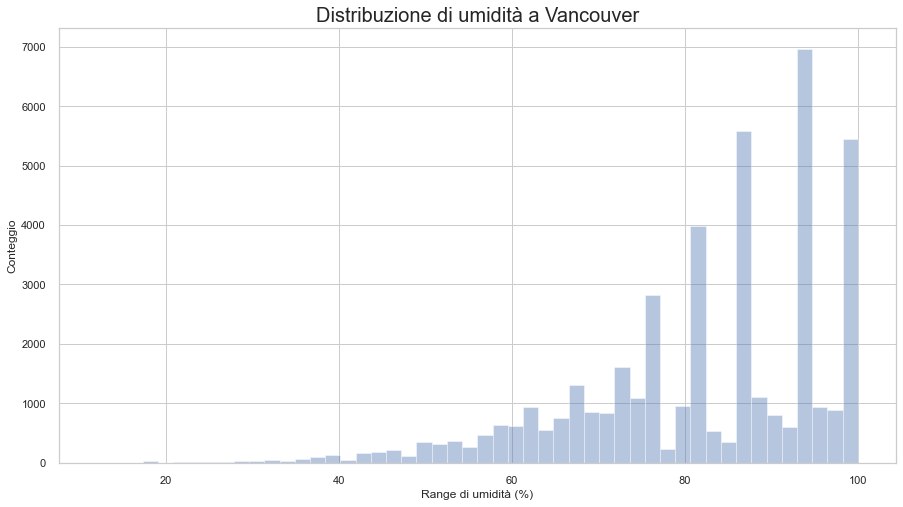

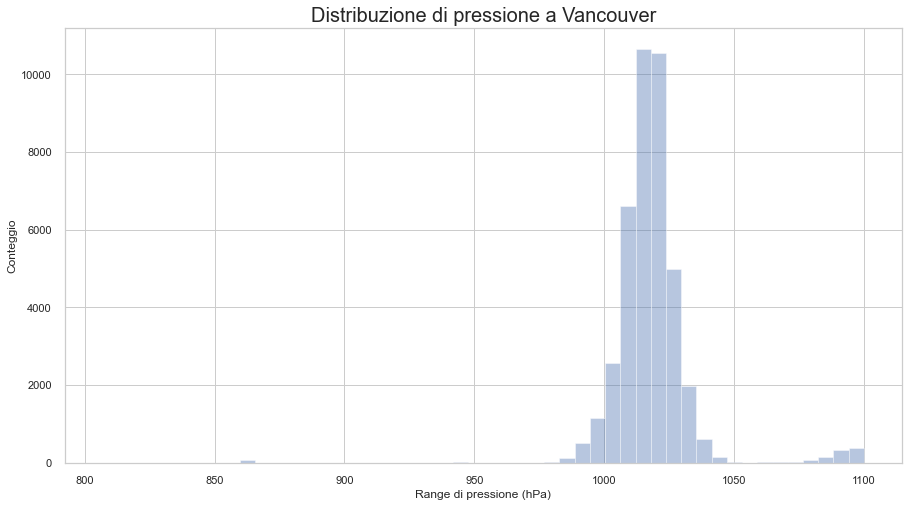

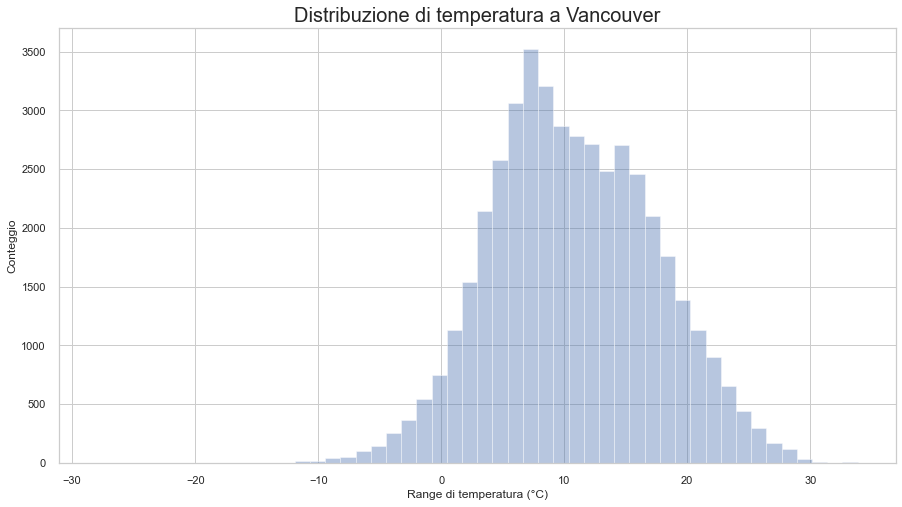

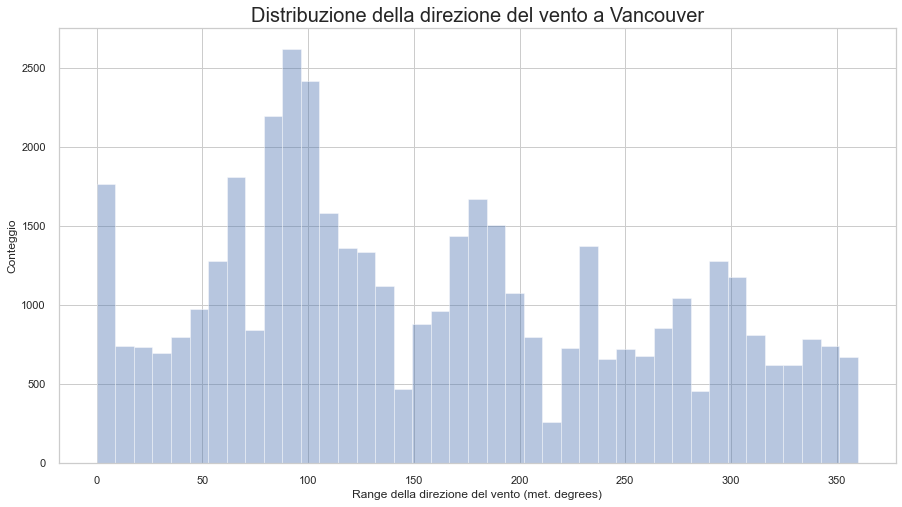

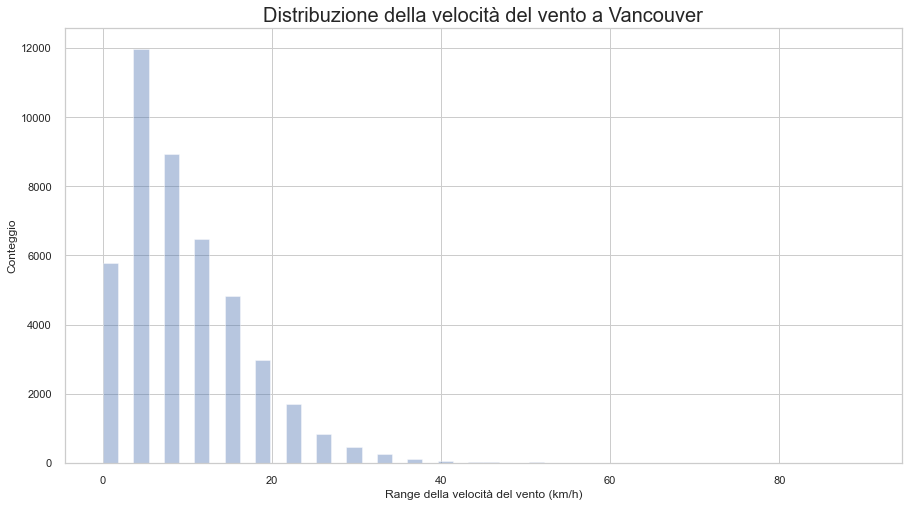

In [301]:
# Visualizzazione distribuzioni
sns.set(style = 'whitegrid')

plt.figure(figsize=(15,8))
sns.distplot(humidity_h.loc['Vancouver'], kde=False)
plt.title('Distribuzione di umidità a Vancouver', fontsize = 20)
plt.xlabel('Range di umidità (%)')
plt.ylabel('Conteggio')
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(pressure_h.loc['Vancouver'], kde=False)
plt.title('Distribuzione di pressione a Vancouver', fontsize = 20)
plt.xlabel('Range di pressione (hPa)')
plt.ylabel('Conteggio')
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(temperature_h.loc['Vancouver'], kde=False)
plt.title('Distribuzione di temperatura a Vancouver', fontsize = 20)
plt.xlabel('Range di temperatura (°C)')
plt.ylabel('Conteggio')
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(wind_direction_h.loc['Vancouver'], kde=False)
plt.title('Distribuzione della direzione del vento a Vancouver', fontsize = 20)
plt.xlabel('Range della direzione del vento (met. degrees)')
plt.ylabel('Conteggio')
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(wind_speed_h.loc['Vancouver'], kde=False)
plt.title('Distribuzione della velocità del vento a Vancouver', fontsize = 20)
plt.xlabel('Range della velocità del vento (km/h)')
plt.ylabel('Conteggio')
plt.show()

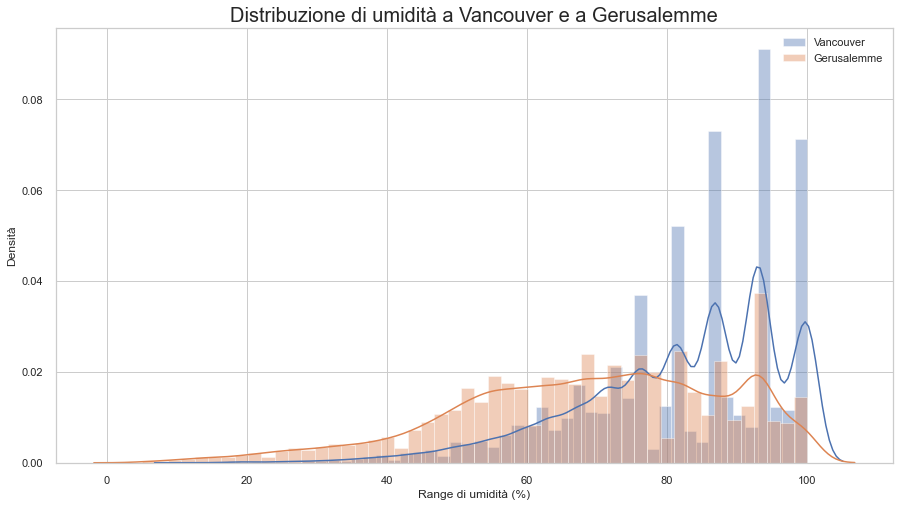

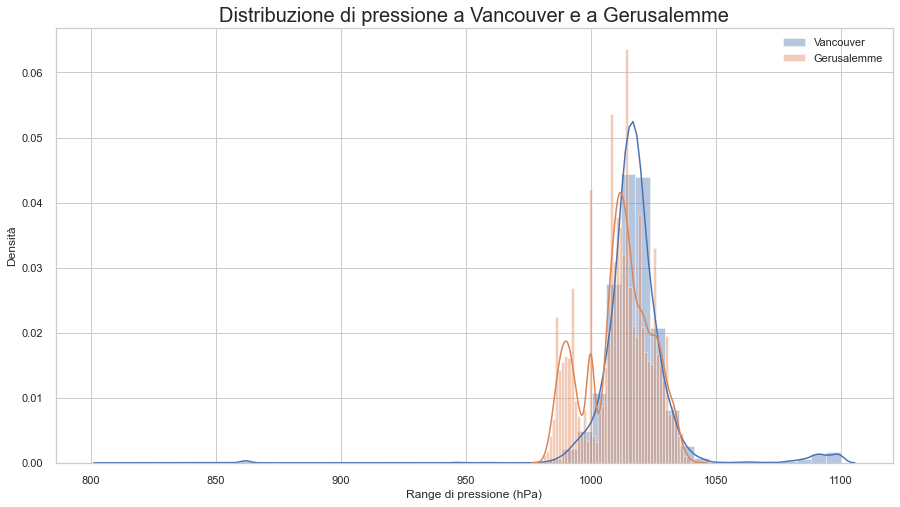

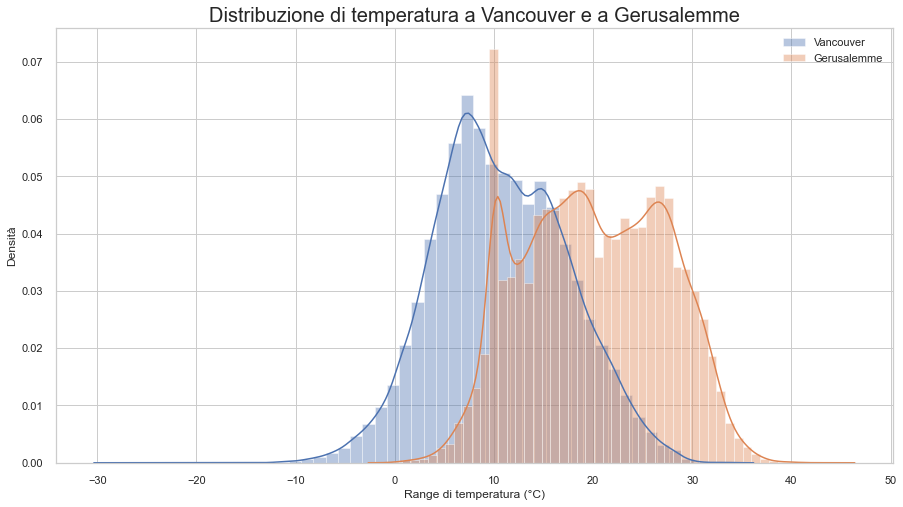

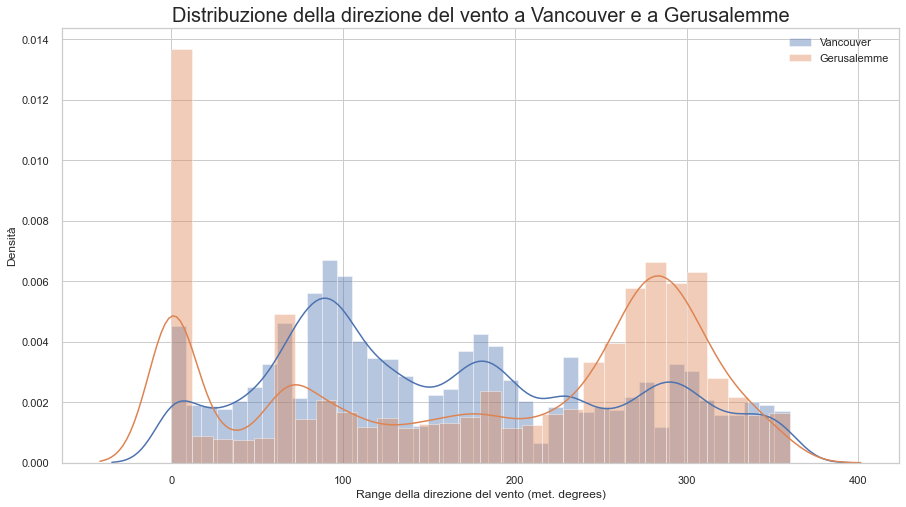

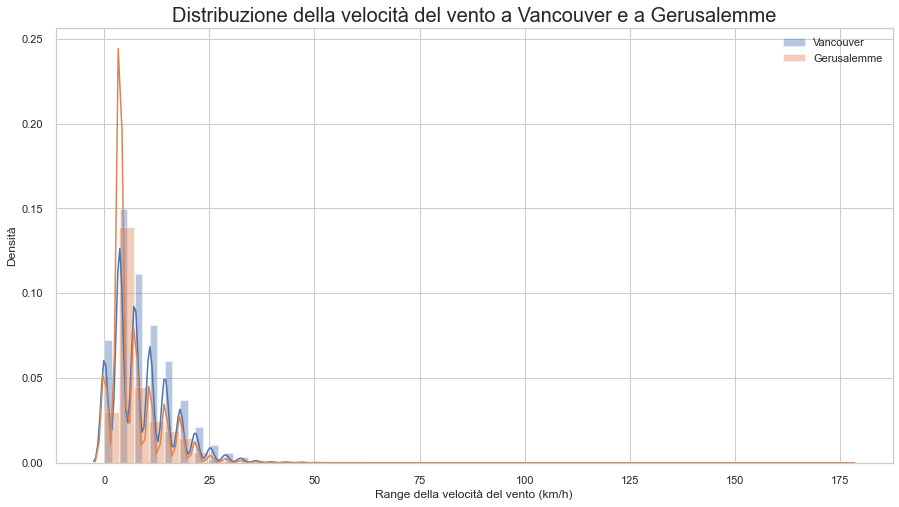

In [302]:
# Confronto distribuzioni tra città geograficamente lontane
sns.set(style = 'whitegrid')

plt.figure(figsize=(15,8))
sns.distplot(humidity_h.loc['Vancouver'], kde=True, label = 'Vancouver')
sns.distplot(humidity_h.loc['Jerusalem'], kde=True, label = 'Gerusalemme')
plt.title('Distribuzione di umidità a Vancouver e a Gerusalemme', fontsize = 20)
plt.xlabel('Range di umidità (%)')
plt.ylabel('Densità')
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(pressure_h.loc['Vancouver'], kde=True, label = 'Vancouver')
sns.distplot(pressure_h.loc['Jerusalem'], kde=True, label = 'Gerusalemme')
plt.title('Distribuzione di pressione a Vancouver e a Gerusalemme', fontsize = 20)
plt.xlabel('Range di pressione (hPa)')
plt.ylabel('Densità')
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(temperature_h.loc['Vancouver'], kde=True, label = 'Vancouver')
sns.distplot(temperature_h.loc['Jerusalem'], kde=True, label = 'Gerusalemme')
plt.title('Distribuzione di temperatura a Vancouver e a Gerusalemme', fontsize = 20)
plt.xlabel('Range di temperatura (°C)')
plt.ylabel('Densità')
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(wind_direction_h.loc['Vancouver'], kde=True, label = 'Vancouver')
sns.distplot(wind_direction_h.loc['Jerusalem'], kde=True, label = 'Gerusalemme')
plt.title('Distribuzione della direzione del vento a Vancouver e a Gerusalemme', fontsize = 20)
plt.xlabel('Range della direzione del vento (met. degrees)')
plt.ylabel('Densità')
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(15,8))
sns.distplot(wind_speed_h.loc['Vancouver'], kde=True, label = 'Vancouver')
sns.distplot(wind_speed_h.loc['Jerusalem'], kde=True, label = 'Gerusalemme')
plt.title('Distribuzione della velocità del vento a Vancouver e a Gerusalemme', fontsize = 20)
plt.xlabel('Range della velocità del vento (km/h)')
plt.ylabel('Densità')
plt.legend(loc="upper right")
plt.show()

In [303]:
# Creazione dataset per giorni con tutti dati
a = humidity_d.dropna(axis=1)
b = pressure_d.dropna(axis=1)
c = temperature_d.dropna(axis=1)
d = wind_direction_d.dropna(axis=1)
e = wind_speed_d.dropna(axis=1)

dataset = pd.concat([a, b, c, d, e], axis=1)

dataset.head(36)

datetime,2012-10-01,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,...,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28
Vancouver,78.273,77.375,71.625,49.000,43.409,43.167,49.889,59.842,61.875,76.174,...,13.35,9.90,16.35,17.10,9.75,6.15,9.60,11.40,7.65,14.40
Portland,78.727,65.833,66.208,51.167,40.391,40.750,36.682,37.591,55.524,62.600,...,16.05,18.45,17.55,21.60,4.65,5.40,4.80,11.25,14.85,7.35
San Francisco,83.000,65.958,47.083,60.167,69.667,73.542,71.583,72.042,74.208,74.500,...,10.20,14.10,13.20,10.05,7.35,10.35,7.35,5.25,3.30,7.20
Seattle,78.000,65.167,58.417,48.870,48.522,48.450,49.833,51.292,61.625,68.083,...,16.80,16.35,11.10,20.85,6.75,8.25,8.10,9.00,10.35,4.65
Los Angeles,88.000,64.917,44.875,66.625,70.250,75.042,74.583,73.250,76.208,70.417,...,4.50,6.00,4.05,3.00,4.95,9.30,3.30,3.30,1.95,2.70
San Diego,79.909,65.875,59.750,75.583,72.792,70.000,72.417,72.833,68.958,65.083,...,6.90,10.65,10.20,7.35,6.45,6.90,7.35,4.50,7.05,4.95
Las Vegas,20.727,16.167,14.500,15.167,14.647,20.053,20.600,17.083,20.722,16.625,...,6.90,25.95,19.20,7.80,11.40,15.90,8.10,7.05,7.65,7.65
Phoenix,24.182,24.476,18.381,20.238,27.778,27.429,23.417,28.476,30.100,32.682,...,9.45,10.50,9.00,8.40,8.55,10.80,14.85,8.25,9.00,10.65
Albuquerque,48.909,40.364,31.905,19.682,18.250,19.238,29.696,51.750,37.000,20.353,...,9.30,13.95,18.90,12.60,16.35,21.45,6.45,6.60,22.05,7.35
Denver,63.182,66.647,36.870,14.750,49.500,66.095,79.909,63.000,32.611,22.308,...,6.60,6.90,22.05,9.30,13.95,8.55,9.30,18.00,6.75,4.80


In [304]:
# Prendo un giorno per l'analisi di correlazione
correlation_dataset = dataset["2016-01-10"]

a = correlation_dataset.iloc[: , 0].values
b = correlation_dataset.iloc[: , 1].values
c = correlation_dataset.iloc[: , 2].values
d = correlation_dataset.iloc[: , 3].values
e = correlation_dataset.iloc[: , 4].values

x = {'Umidità': a, 'Pressione': b, 'Temperatura': c, 'Direzione del vento': d, 'Velocità del vento': e}

correlation_dataset = pd.DataFrame(data=x, index=cities)

correlation_dataset.head(36) 

,Umidità,Pressione,Temperatura,Direzione del vento,Velocità del vento
Vancouver,93.875,1024.417,1.072,174.500,6.00
Portland,82.917,1024.000,3.840,145.042,9.75
San Francisco,82.667,1014.875,9.713,221.125,14.85
Seattle,91.875,1024.625,4.464,85.375,3.90
Los Angeles,76.125,1022.375,11.822,109.417,4.65
San Diego,87.042,1022.792,12.342,152.750,4.20
Las Vegas,65.208,1021.500,5.996,134.583,6.60
Phoenix,78.083,1022.292,7.979,160.417,4.80
Albuquerque,64.917,1020.208,-2.562,224.292,8.25
Denver,75.542,1017.000,-8.335,187.208,7.05


[Text(0.5, 0, 'Umidità'),
 Text(1.5, 0, 'Pressione'),
 Text(2.5, 0, 'Temperatura'),
 Text(3.5, 0, 'Direzione del vento'),
 Text(4.5, 0, 'Velocità del vento')]

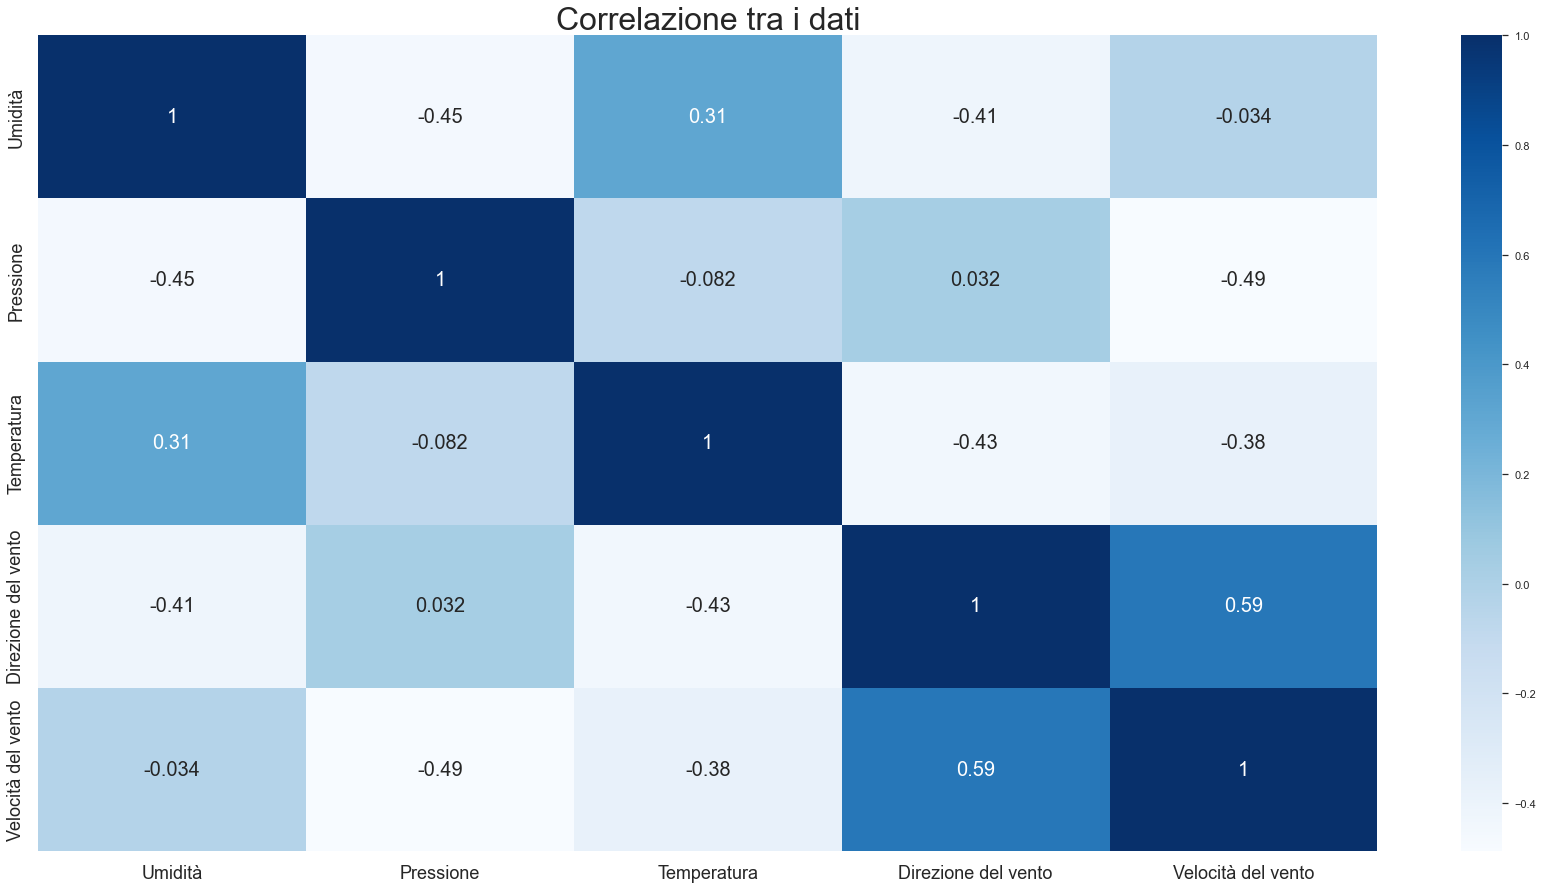

In [305]:
# Correlazione dei dati
plt.figure(figsize=(30,15))
ax = sns.heatmap(correlation_dataset.corr(),cmap="Blues",annot=True,annot_kws={"size": 20})
plt.title("Correlazione tra i dati", size=32)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)

# Clustering
___

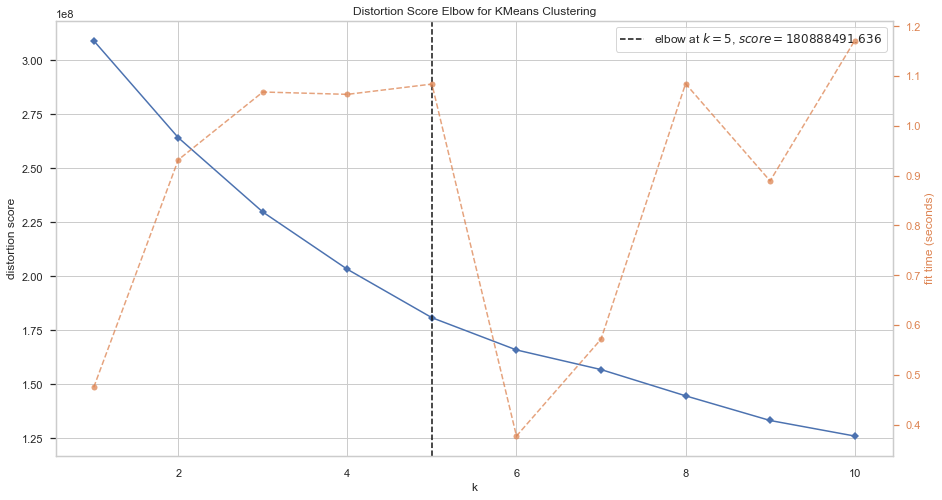

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [306]:
# Elbow method per il numero di cluster da utilizzare
x = dataset.values
random_state = 23
model = KMeans(random_state=random_state)
visualizer = KElbowVisualizer(model, k=(1,11))

plt.figure(figsize=(15,8))
visualizer.fit(x)
visualizer.show()

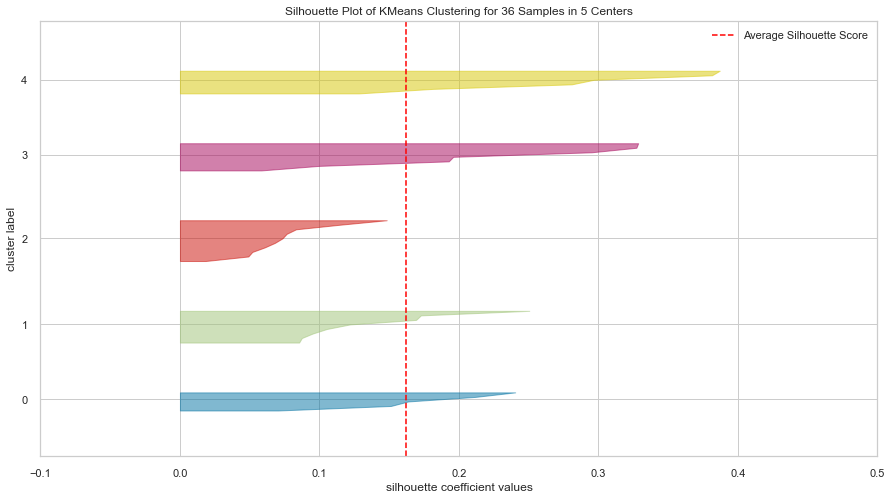

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 36 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [307]:
# Silhouette visualizer per i cluster
model = KMeans(5, random_state=random_state)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

plt.figure(figsize=(15,8))
visualizer.fit(x)
visualizer.show()

In [308]:
# PCA per ridurre le componenti da plottare a 2
pca = PCA(n_components=2, svd_solver="auto").fit(x)
pca_x = pca.transform(x)

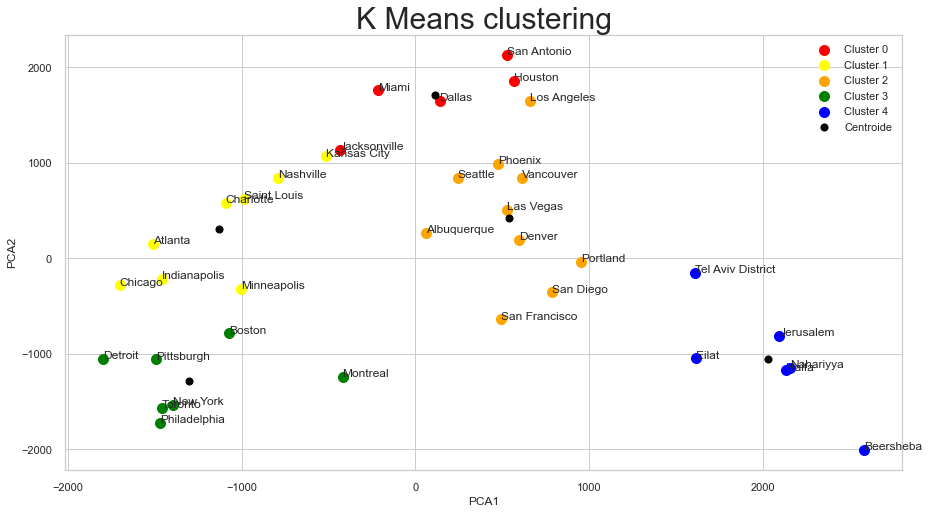

In [309]:
# K Means clustering
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = random_state)
ymeans = kmeans.fit_predict(x)

plt.figure(figsize=(15,8))
plt.title('K Means clustering', fontsize = 30)

plt.scatter(pca_x[ymeans == 0, 0], pca_x[ymeans == 0, 1], s = 100, c = 'red', label="Cluster 0")
plt.scatter(pca_x[ymeans == 1, 0], pca_x[ymeans == 1, 1], s = 100, c = 'yellow', label="Cluster 1")
plt.scatter(pca_x[ymeans == 2, 0], pca_x[ymeans == 2, 1], s = 100, c = 'orange', label="Cluster 2")
plt.scatter(pca_x[ymeans == 3, 0], pca_x[ymeans == 3, 1], s = 100, c = 'green', label="Cluster 3")
plt.scatter(pca_x[ymeans == 4, 0], pca_x[ymeans == 4, 1], s = 100, c = 'blue', label="Cluster 4")

for i, txt in enumerate(cities):
    plt.annotate(txt, (pca_x[i, 0], pca_x[i, 1]))

centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'black', label="Centroide")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Nearest Neighbors')

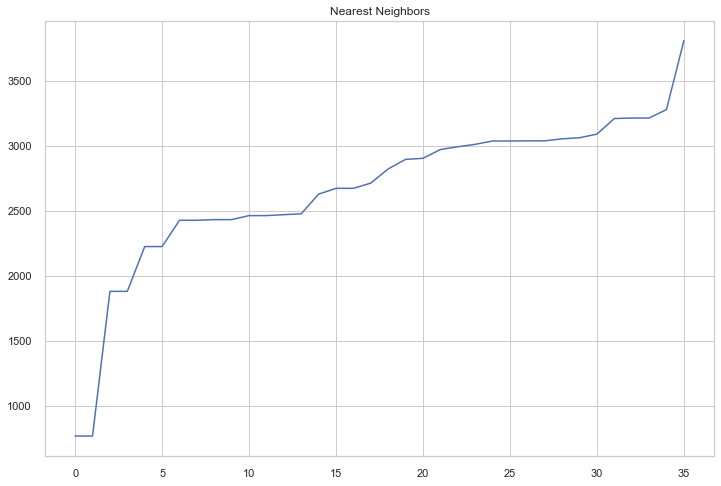

In [310]:
# Nearest Neighbors per il valore di epsilon
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(x)
distances, indices = nbrs.kneighbors(x)

distances = np.sort(distances, axis=0)
plt.figure(figsize=(12,8))
plt.plot(distances[:,1])
plt.title("Nearest Neighbors")

In [311]:
# DBSCAN
db = DBSCAN(eps=3300, min_samples=5).fit(x)
db_ymeans = db.labels_
print(db_ymeans)

[ 0  0  0  0 -1  0 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1  1 -1
  1  1  1  1  1  1  2  2 -1  2  2  2]


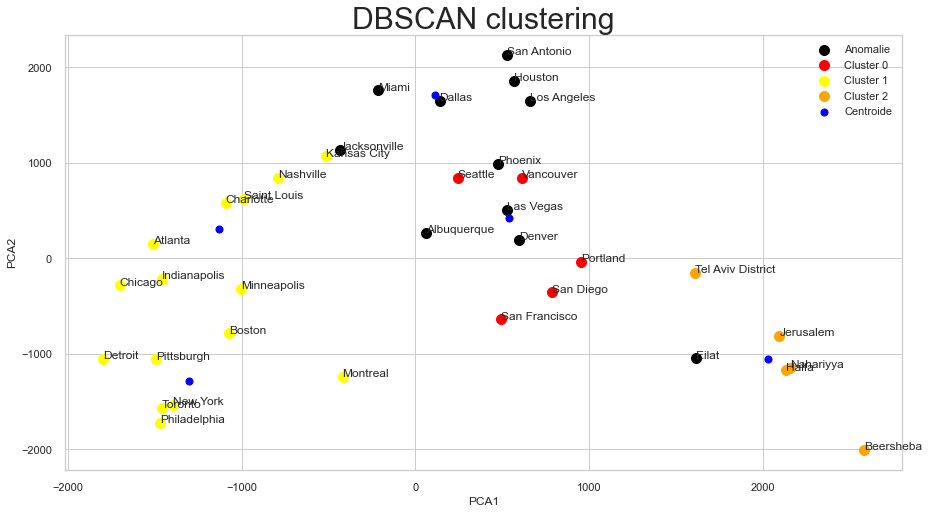

In [312]:
# DBSCAN
plt.figure(figsize=(15,8))
plt.title('DBSCAN clustering', fontsize = 30)

plt.scatter(pca_x[db_ymeans == -1, 0], pca_x[db_ymeans == -1, 1], s = 100, c = 'black', label="Anomalie")
plt.scatter(pca_x[db_ymeans == 0, 0], pca_x[db_ymeans == 0, 1], s = 100, c = 'red', label="Cluster 0")
plt.scatter(pca_x[db_ymeans == 1, 0], pca_x[db_ymeans == 1, 1], s = 100, c = 'yellow', label="Cluster 1")
plt.scatter(pca_x[db_ymeans == 2, 0], pca_x[db_ymeans == 2, 1], s = 100, c = 'orange', label="Cluster 2")

for i, txt in enumerate(cities):
    plt.annotate(txt, (pca_x[i, 0], pca_x[i, 1]))
    
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], s = 50, c = 'blue', label="Centroide")

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()

In [313]:
# Assegno i cluster alle città
cluster_data = {'Cluster': ymeans}

cluster= pd.DataFrame(data=cluster_data, index=cities)
city_attributes = pd.concat([city_attributes, cluster], axis=1)
city_attributes.head(36)

,Country,Latitude,Longitude,Cluster
Vancouver,Canada,49.249660,-123.119339,2
Portland,United States,45.523449,-122.676208,2
San Francisco,United States,37.774929,-122.419418,2
Seattle,United States,47.606209,-122.332069,2
Los Angeles,United States,34.052231,-118.243683,2
San Diego,United States,32.715328,-117.157257,2
Las Vegas,United States,36.174969,-115.137222,2
Phoenix,United States,33.448380,-112.074043,2
Albuquerque,United States,35.084492,-106.651138,2
Denver,United States,39.739151,-104.984703,2


,Country,Latitude,Longitude,Cluster,geometry
Vancouver,Canada,49.249660,-123.119339,2,POINT (-123.11934 49.24966)
Portland,United States,45.523449,-122.676208,2,POINT (-122.67621 45.52345)
San Francisco,United States,37.774929,-122.419418,2,POINT (-122.41942 37.77493)
Seattle,United States,47.606209,-122.332069,2,POINT (-122.33207 47.60621)
Los Angeles,United States,34.052231,-118.243683,2,POINT (-118.24368 34.05223)
San Diego,United States,32.715328,-117.157257,2,POINT (-117.15726 32.71533)
Las Vegas,United States,36.174969,-115.137222,2,POINT (-115.13722 36.17497)
Phoenix,United States,33.448380,-112.074043,2,POINT (-112.07404 33.44838)
Albuquerque,United States,35.084492,-106.651138,2,POINT (-106.65114 35.08449)
Denver,United States,39.739151,-104.984703,2,POINT (-104.98470 39.73915)


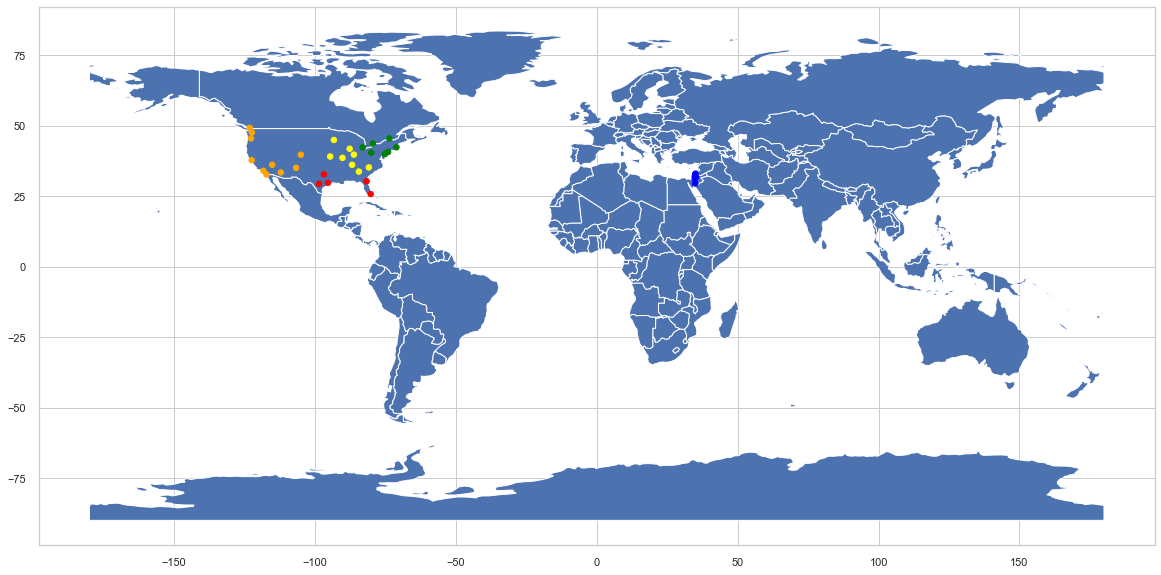

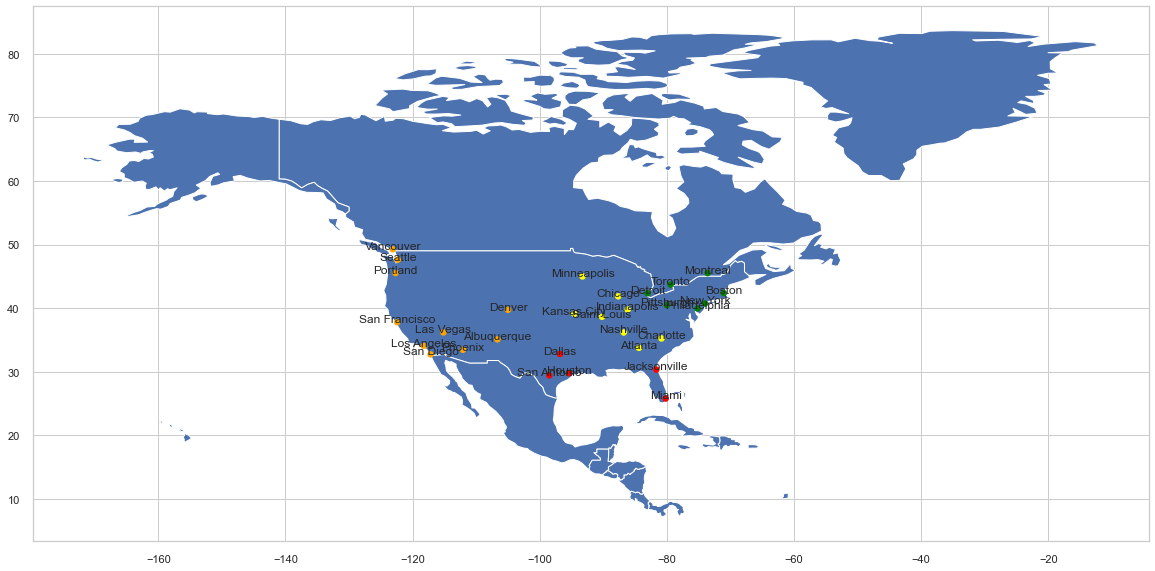

In [314]:
# Plotto le città sulla mappa
colors = [0]*36

for i, number in enumerate(city_attributes['Cluster'].values):
    if(number == 0): 
        colors[i]="red"
    if(number == 1): 
        colors[i]="yellow"
    if(number == 2): 
        colors[i]="orange"
    if(number == 3): 
        colors[i]="green"
    if(number == 4): 
        colors[i]="blue"

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

geometry = [Point(xy) for xy in zip(city_attributes['Longitude'], city_attributes['Latitude'])]
gdf = GeoDataFrame(city_attributes, geometry=geometry)

gdf.plot(ax=world.plot(figsize=(20, 12)), marker='o', color=colors, markersize=30);

america = world[world.continent == 'North America']

city_attributes_america = city_attributes

city_attributes_america = city_attributes_america.query("Cluster != 4")

colors = [0]*30

for i, number in enumerate(city_attributes_america['Cluster'].values):
    if(number == 0): 
        colors[i]="red"
    if(number == 1): 
        colors[i]="yellow"
    if(number == 2): 
        colors[i]="orange"
    if(number == 3): 
        colors[i]="green"   

geometry = [Point(xy) for xy in zip(city_attributes_america['Longitude'], city_attributes_america['Latitude'])]
gdf = GeoDataFrame(city_attributes_america, geometry=geometry)

america_only = gdf.plot(ax=america.plot(figsize=(20, 12)), marker='o', color=colors, markersize=30);

for city in city_attributes_america.index.values:
    america_only.annotate(text=city, xy=(city_attributes_america.loc[city,'Longitude'], city_attributes_america.loc[city,'Latitude']), horizontalalignment='center')

city_attributes_america.head(36)

# Classificazione
___

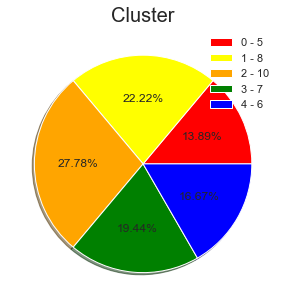

In [315]:
# Grafico a torta delle città per cluster
counts = city_attributes['Cluster'].value_counts()
size = [counts[0], counts[1], counts[2], counts[3], counts[4]]
labels = ['0 - ' + str(size[0]), '1 - ' + str(size[1]), '2 - ' + str(size[2]), '3 - ' + str(size[3]), '4 - ' + str(size[4])]
colors = ['red', 'yellow', 'orange', 'green', 'blue']

plt.figure(figsize=(5,5))
plt.pie(size, colors = colors, shadow = True, autopct = '%.2f%%')
plt.title('Cluster', fontsize = 20)
plt.axis('off')
plt.legend(loc = 'upper right', labels = labels)
plt.show()

In [316]:
# Data normalization
names = dataset.columns
scaler = MinMaxScaler()
scaled_dataset = scaler.fit_transform(dataset[names])
dataset[names] = scaled_dataset
dataset.head(36)

datetime,2012-10-01,2012-10-02,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,...,2017-10-19,2017-10-20,2017-10-21,2017-10-22,2017-10-23,2017-10-24,2017-10-25,2017-10-26,2017-10-27,2017-10-28
Vancouver,0.742089,0.783051,0.724247,0.428125,0.366886,0.323921,0.453474,0.632296,0.652073,0.881567,...,0.553571,0.262069,0.539474,0.740157,0.309091,0.100629,0.304348,0.439024,0.213483,0.561151
Portland,0.747943,0.635391,0.655569,0.455213,0.328388,0.291202,0.248994,0.303261,0.551441,0.680617,...,0.714286,0.655172,0.592105,0.976378,0.000000,0.069182,0.072464,0.430894,0.483146,0.223022
San Francisco,0.803046,0.636991,0.413097,0.567713,0.701830,0.735099,0.789357,0.812702,0.847491,0.856785,...,0.366071,0.455172,0.401316,0.370079,0.163636,0.276730,0.195652,0.105691,0.050562,0.215827
Seattle,0.738568,0.626871,0.556792,0.426500,0.432107,0.395435,0.452607,0.505863,0.648112,0.761788,...,0.758929,0.558621,0.309211,0.937008,0.127273,0.188679,0.231884,0.308943,0.314607,0.093525
Los Angeles,0.867524,0.623673,0.385103,0.648438,0.709267,0.755405,0.835805,0.830566,0.879181,0.796340,...,0.026786,0.082759,0.000000,0.000000,0.018182,0.232704,0.000000,0.000000,0.000000,0.000000
San Diego,0.763186,0.635929,0.573693,0.760412,0.741693,0.687152,0.802270,0.824399,0.764304,0.717376,...,0.169643,0.296552,0.269737,0.228346,0.109091,0.132075,0.195652,0.065041,0.191011,0.107914
Las Vegas,0.000000,0.000000,0.000000,0.005213,0.000000,0.011032,0.000000,0.000000,0.000000,0.000000,...,0.169643,1.000000,0.664474,0.251969,0.409091,0.509434,0.231884,0.203252,0.213483,0.237410
Phoenix,0.044554,0.106299,0.049204,0.068600,0.167498,0.110879,0.043615,0.168473,0.148595,0.237709,...,0.321429,0.289655,0.217105,0.283465,0.236364,0.295597,0.557971,0.268293,0.264045,0.381295
Albuquerque,0.363423,0.309559,0.220666,0.061650,0.045960,0.000000,0.140831,0.512636,0.257927,0.055190,...,0.312500,0.448276,0.651316,0.503937,0.709091,0.742138,0.152174,0.178862,0.752809,0.223022
Denver,0.547481,0.645805,0.283613,0.000000,0.444582,0.634291,0.918267,0.678994,0.188382,0.084132,...,0.151786,0.124138,0.789474,0.330709,0.563636,0.201258,0.289855,0.796748,0.179775,0.100719


In [317]:
# Creazione x
dataset.columns = [str(x) for x in range(0, len(dataset.columns))]
x = dataset
x.head(36)

,0,1,2,3,4,5,6,7,8,9,...,9200,9201,9202,9203,9204,9205,9206,9207,9208,9209
Vancouver,0.742089,0.783051,0.724247,0.428125,0.366886,0.323921,0.453474,0.632296,0.652073,0.881567,...,0.553571,0.262069,0.539474,0.740157,0.309091,0.100629,0.304348,0.439024,0.213483,0.561151
Portland,0.747943,0.635391,0.655569,0.455213,0.328388,0.291202,0.248994,0.303261,0.551441,0.680617,...,0.714286,0.655172,0.592105,0.976378,0.000000,0.069182,0.072464,0.430894,0.483146,0.223022
San Francisco,0.803046,0.636991,0.413097,0.567713,0.701830,0.735099,0.789357,0.812702,0.847491,0.856785,...,0.366071,0.455172,0.401316,0.370079,0.163636,0.276730,0.195652,0.105691,0.050562,0.215827
Seattle,0.738568,0.626871,0.556792,0.426500,0.432107,0.395435,0.452607,0.505863,0.648112,0.761788,...,0.758929,0.558621,0.309211,0.937008,0.127273,0.188679,0.231884,0.308943,0.314607,0.093525
Los Angeles,0.867524,0.623673,0.385103,0.648438,0.709267,0.755405,0.835805,0.830566,0.879181,0.796340,...,0.026786,0.082759,0.000000,0.000000,0.018182,0.232704,0.000000,0.000000,0.000000,0.000000
San Diego,0.763186,0.635929,0.573693,0.760412,0.741693,0.687152,0.802270,0.824399,0.764304,0.717376,...,0.169643,0.296552,0.269737,0.228346,0.109091,0.132075,0.195652,0.065041,0.191011,0.107914
Las Vegas,0.000000,0.000000,0.000000,0.005213,0.000000,0.011032,0.000000,0.000000,0.000000,0.000000,...,0.169643,1.000000,0.664474,0.251969,0.409091,0.509434,0.231884,0.203252,0.213483,0.237410
Phoenix,0.044554,0.106299,0.049204,0.068600,0.167498,0.110879,0.043615,0.168473,0.148595,0.237709,...,0.321429,0.289655,0.217105,0.283465,0.236364,0.295597,0.557971,0.268293,0.264045,0.381295
Albuquerque,0.363423,0.309559,0.220666,0.061650,0.045960,0.000000,0.140831,0.512636,0.257927,0.055190,...,0.312500,0.448276,0.651316,0.503937,0.709091,0.742138,0.152174,0.178862,0.752809,0.223022
Denver,0.547481,0.645805,0.283613,0.000000,0.444582,0.634291,0.918267,0.678994,0.188382,0.084132,...,0.151786,0.124138,0.789474,0.330709,0.563636,0.201258,0.289855,0.796748,0.179775,0.100719


In [318]:
# Creazione y
y = city_attributes.iloc[:, -2:].drop("geometry", axis=1)
y.head(36)

,Cluster
Vancouver,2
Portland,2
San Francisco,2
Seattle,2
Los Angeles,2
San Diego,2
Las Vegas,2
Phoenix,2
Albuquerque,2
Denver,2


In [319]:
# Split dei dati
random_state = 34
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=random_state)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28, 9210)
(8, 9210)
(28, 1)
(8, 1)


In [320]:
# Preparazione dei classificatori
classifiers = [
    LogisticRegression(random_state = random_state),
    DecisionTreeClassifier(random_state=random_state),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=random_state),
]

clf_name = []
model_results = pd.DataFrame.copy(y_test)
kfold = StratifiedKFold(n_splits=5)
cv_results = []
cv_acc = []
cv_std = []
cnfm = []
clr = []

print("Accuracy:")

# Train
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)

    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred

    cv_results.append(cross_val_score(clf, x, y, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2)
    train_pred = clf.predict_proba(x_test)
    print(f'{acc}\t---> {name} ')

    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    
for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy:
1.0	---> LogisticRegression 
0.75	---> DecisionTreeClassifier 
1.0	---> SVC 
1.0	---> RandomForestClassifier 


In [321]:
# Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" );
    print (clr[i]);

LogisticRegression Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8

DecisionTreeClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         2
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       0.50      1.00      0.67         1

    accuracy                           0.75         8
   macro avg       0.60      0.70      0.63

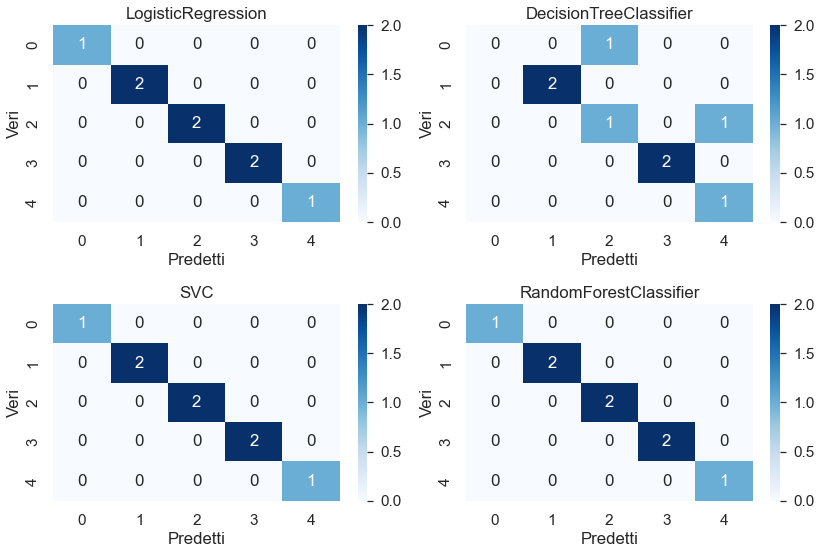

In [322]:
# Matrici di confusione non normalizzate
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Blues")
    plt.xlabel('Predetti')
    plt.ylabel('Veri')
    plt.title(clf_name[i])

[Text(0.5, 0, 'LogisticRegression'),
 Text(1.5, 0, 'DecisionTreeClassifier'),
 Text(2.5, 0, 'SVC'),
 Text(3.5, 0, 'RandomForestClassifier')]

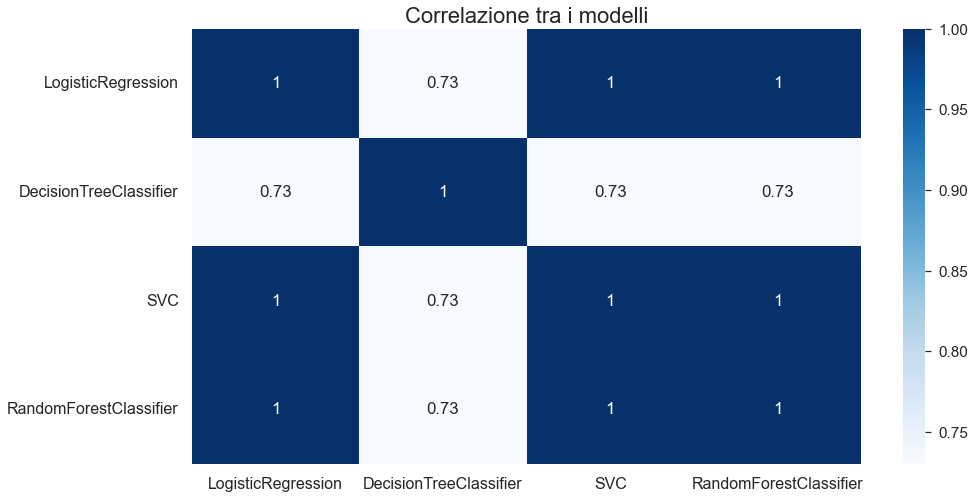

In [323]:
# Correlazione tra i modelli
plt.figure(figsize=(15,8))
ax = sns.heatmap(model_results.drop("Cluster", axis=1).corr(), cmap="Blues", annot=True)
plt.title("Correlazione tra i modelli", size=22)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 16)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 16)

Cross validation accuracy media:
1.0	---> LogisticRegression
0.61	---> DecisionTreeClassifier
1.0	---> SVC
0.83	---> RandomForestClassifier


Text(0.5, 1.0, 'Cross validation accuracy')

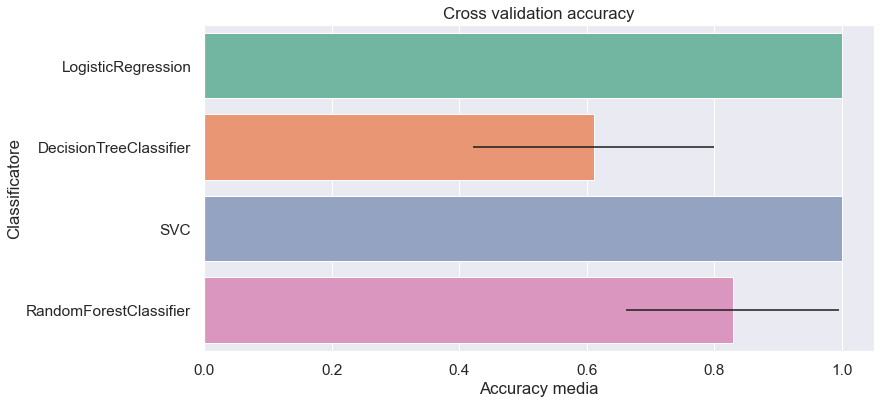

In [324]:
# Cross validation accuracy
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

print("Cross validation accuracy media:")
for i, clf in enumerate(classifiers):
    name = clf.__class__.__name__
    print(f'{round(cv_acc[i], 2)}\t---> {name}')
    
plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Accuracy media")
plt.ylabel("Classificatore")
plt.title("Cross validation accuracy")

In [325]:
# Preparazione variabili per il GridSearch
cv_grid_acc = [0,0]
cv_grid_std = [0,0]
print("Fatto")

Fatto


In [326]:
# GridSearch per i parametri ottimali del decision tree
DT_param = {"max_depth": [2,3,8,10],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "criterion": ["entropy"]}

DTgs = GridSearchCV(DecisionTreeClassifier(random_state=random_state), param_grid=DT_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
DTgs.fit(x, y.values.ravel())

cv_grid_acc[0] = DTgs.best_score_
cv_grid_std[0] = DTgs.cv_results_['std_test_score'][DTgs.best_index_]

print("Fatto")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Fatto


In [327]:
# GridSearch per i parametri ottimali del random forest
RF_param = {"max_depth": [None],
            "max_features": [0.3, 0.7, 1],
            "min_samples_split": [2, 3, 10],
            "min_samples_leaf": [1, 3, 10],
            "bootstrap": [False],
            "n_estimators" :[100,300],
            "criterion": ["gini"]}

RFgs = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid=RF_param, cv=kfold, n_jobs=4, scoring="accuracy", verbose = 1)
RFgs.fit(x, y.values.ravel())

cv_grid_acc[1] = RFgs.best_score_
cv_grid_std[1] = RFgs.cv_results_['std_test_score'][RFgs.best_index_]

print("Fatto")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fatto


In [328]:
# Stampo i risultati del decision tree e del random forest dopo il GridSearch
print(f'Cross validation accuracy media senza GridSearchCV:\n{round(cv_acc[1], 2)}\t---> DecisionTreeClassifier')
print(f'{round(cv_acc[3], 2)}\t---> RandomForestClassifier')
print(f'\nCross validation accuracy media con GridSearchCV:\n{round(cv_grid_acc[0], 2)}\t---> DecisionTreeClassifier')
print(f'{round(cv_grid_acc[1], 2)}\t---> RandomForestClassifier')

Cross validation accuracy media senza GridSearchCV:
0.61	---> DecisionTreeClassifier
0.83	---> RandomForestClassifier

Cross validation accuracy media con GridSearchCV:
0.75	---> DecisionTreeClassifier
1.0	---> RandomForestClassifier


Cross validation accuracy media dopo GridSearch:
1.0	---> LogisticRegression
0.75	---> DecisionTreeClassifier
1.0	---> SVC
1.0	---> RandomForestClassifier


Text(0.5, 1.0, 'Cross validation accuracy dopo GridSearch')

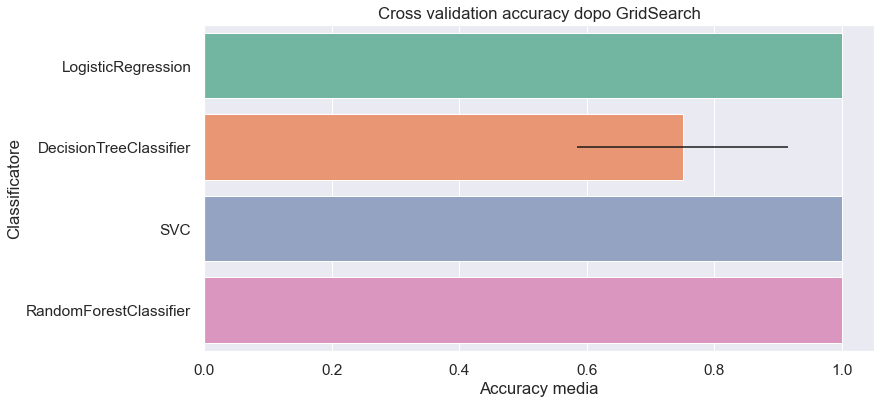

In [329]:
# Cross validation accuracy dopo GridSearch
cv_new_acc = [cv_acc[0], cv_grid_acc[0], cv_acc[2], cv_grid_acc[1]]
cv_new_std = [cv_std[0], cv_grid_std[0], cv_std[2], cv_grid_std[1]]
cv_new_res = pd.DataFrame({"CrossValMeans":cv_new_acc, "CrossValerrors": cv_new_std,"Algorithm":clf_name})
    
print("Cross validation accuracy media dopo GridSearch:")
for i, clf in enumerate(classifiers):
    name = clf.__class__.__name__
    print(f'{round(cv_new_acc[i], 2)}\t---> {name}')

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_new_res, palette="Set2",orient = "h",**{'xerr':cv_new_std})
plt.xlabel("Accuracy media")
plt.ylabel("Classificatore")
plt.title("Cross validation accuracy dopo GridSearch")

# Serie temporali
___

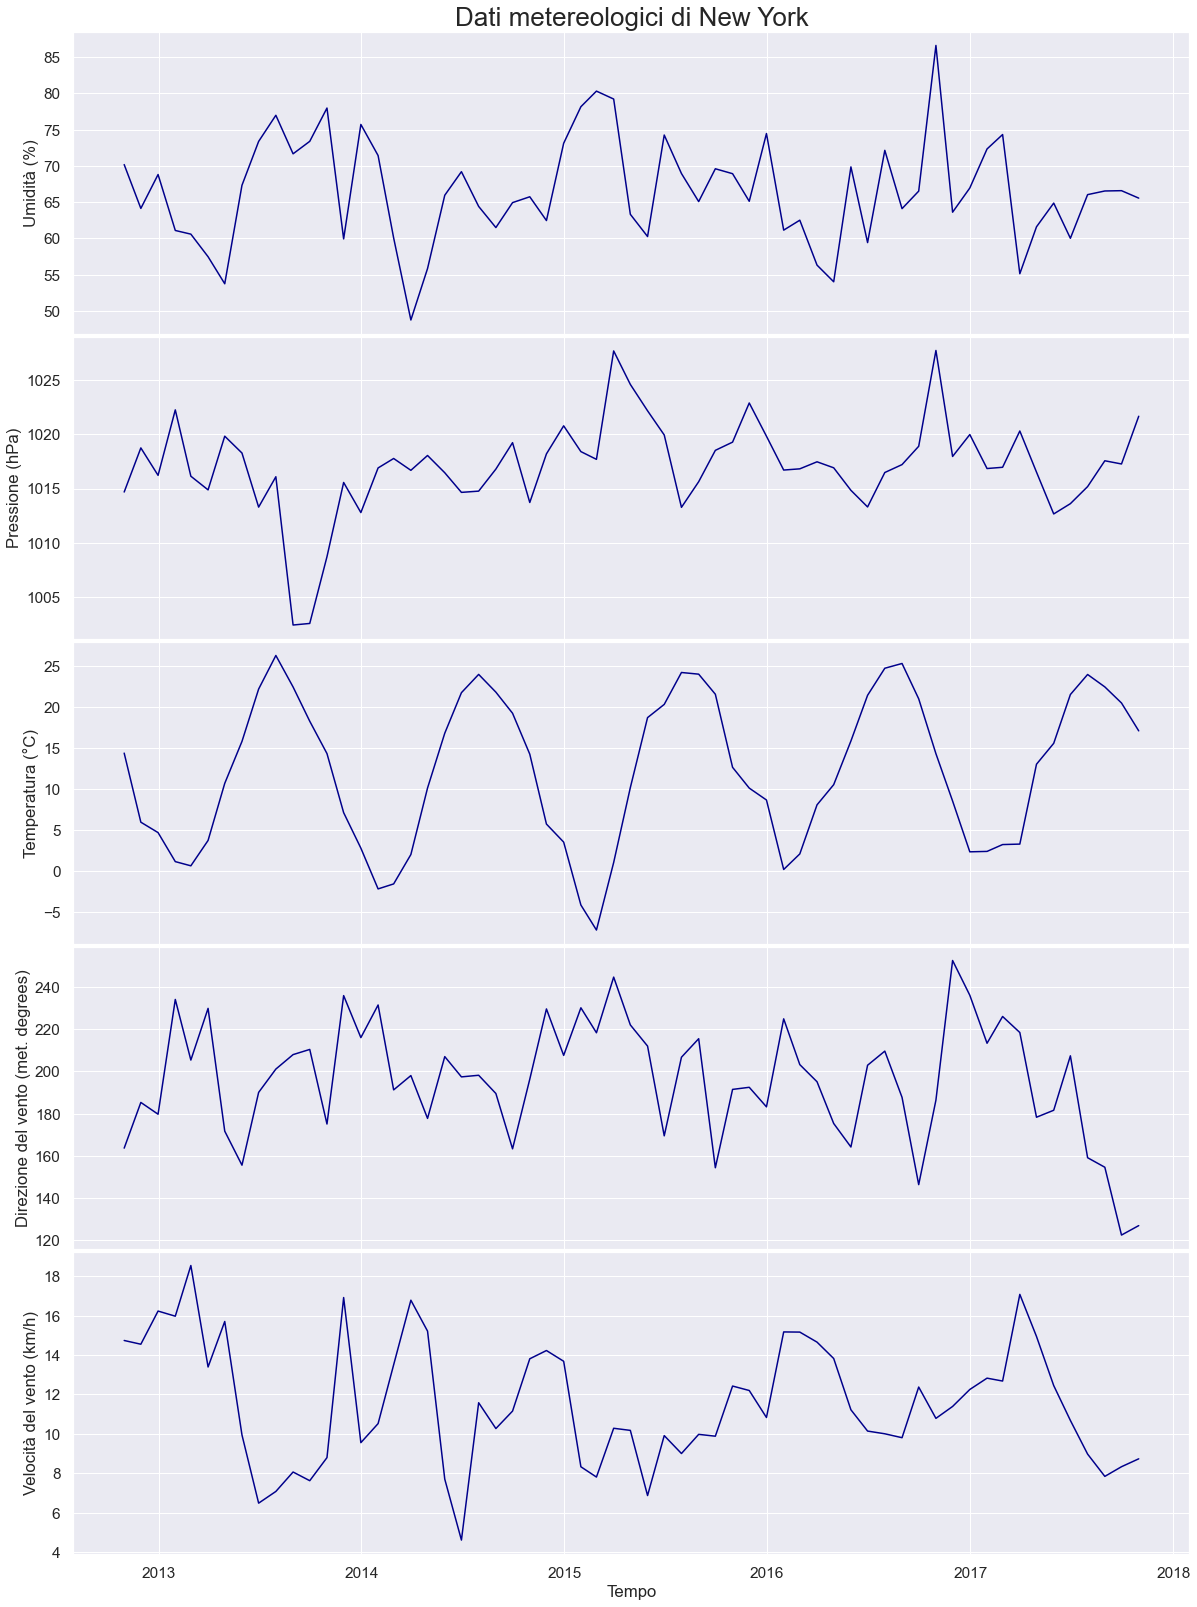

In [330]:
# Plot dei dati metereologici di New York
f, axarr = plt.subplots(5, sharex=True, figsize=(20,28))
axarr[0].plot(months, humidity_m.loc['New York'], color='darkblue')
axarr[0].set_ylabel('Umidità (%)')
axarr[0].set_title('Dati metereologici di New York', fontsize = 26)
axarr[1].plot(months, pressure_m.loc['New York'], color='darkblue')
axarr[1].set_ylabel('Pressione (hPa)')
axarr[2].plot(months, temperature_m.loc['New York'], color='darkblue')
axarr[2].set_ylabel('Temperatura (°C)')
axarr[3].plot(months, wind_direction_m.loc['New York'], color='darkblue')
axarr[3].set_ylabel('Direzione del vento (met. degrees)')
axarr[4].plot(months, wind_speed_m.loc['New York'], color='darkblue')
axarr[4].set_ylabel('Velocità del vento (km/h)')
plt.xlabel('Tempo')
f.subplots_adjust(hspace=0.01)
plt.show()

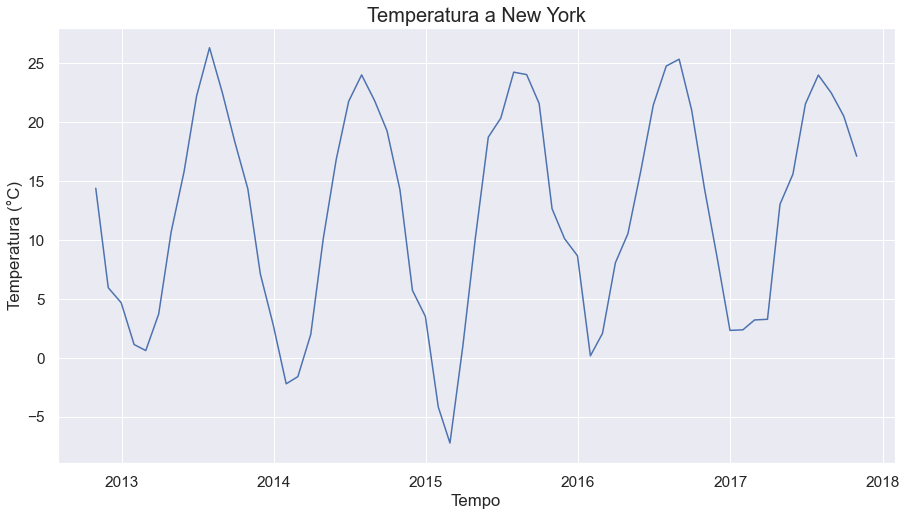

datetime
2012-10-31    14.390
2012-11-30     5.946
2012-12-31     4.673
2013-01-31     1.126
2013-02-28     0.613
               ...  
2017-06-30    21.553
2017-07-31    24.003
2017-08-31    22.485
2017-09-30    20.518
2017-10-31    17.112
Freq: M, Name: New York, Length: 61, dtype: float64

In [331]:
# Creo la serie temporale mensile utilizzando la temperatura a New York
plt.figure(figsize=(15,8))
plt.title("Temperatura a New York", fontsize = 20)
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.plot(months, temperature_m.loc["New York"])
plt.show()
temp_series = temperature_m.dropna(axis=1)
endog = temp_series.loc['New York']
endog.head(61)

In [332]:
# ADF test
result = adfuller(endog)
print('ADF Statistic \t---> %f' % result[0])
print('p-value \t---> %f' % result[1])
if result[1] < 0.05:
    print('La serie è stazionaria')
else:
    print('La serie non è stazionaria')

ADF Statistic 	---> -1.038000
p-value 	---> 0.739154
La serie non è stazionaria


In [333]:
# ADF test sulla prima differenziazione
result = adfuller(endog.diff().dropna())
print('ADF Statistic \t---> %f' % result[0])
print('p-value \t---> %f' % result[1])
if result[1] < 0.05:
    print('La serie è stazionaria')
else:
    print('La serie non è stazionaria')

ADF Statistic 	---> -6.727394
p-value 	---> 0.000000
La serie è stazionaria


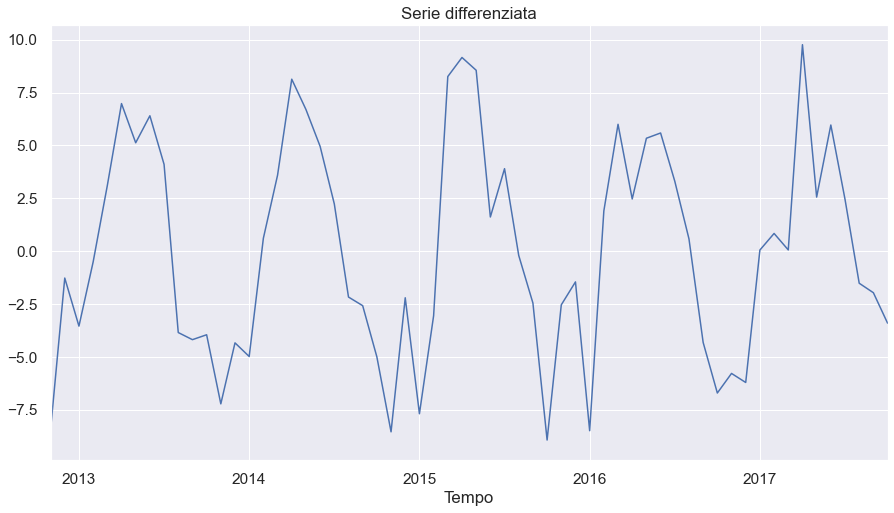

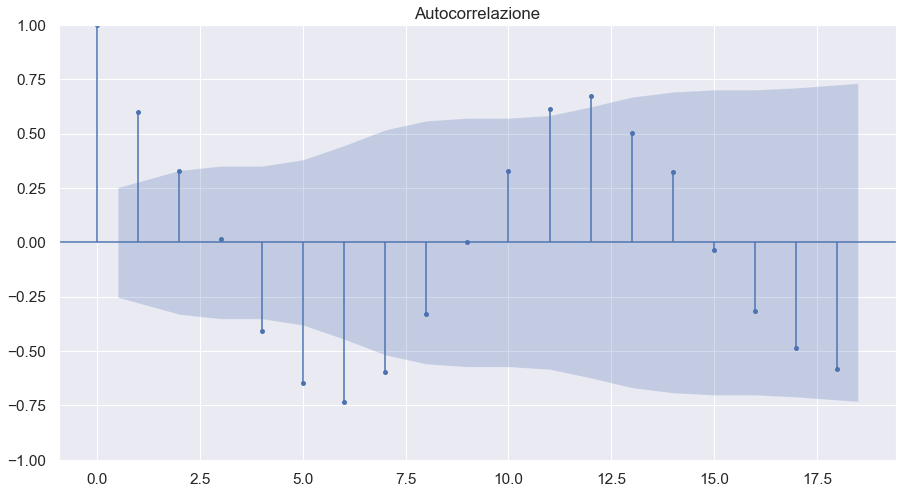

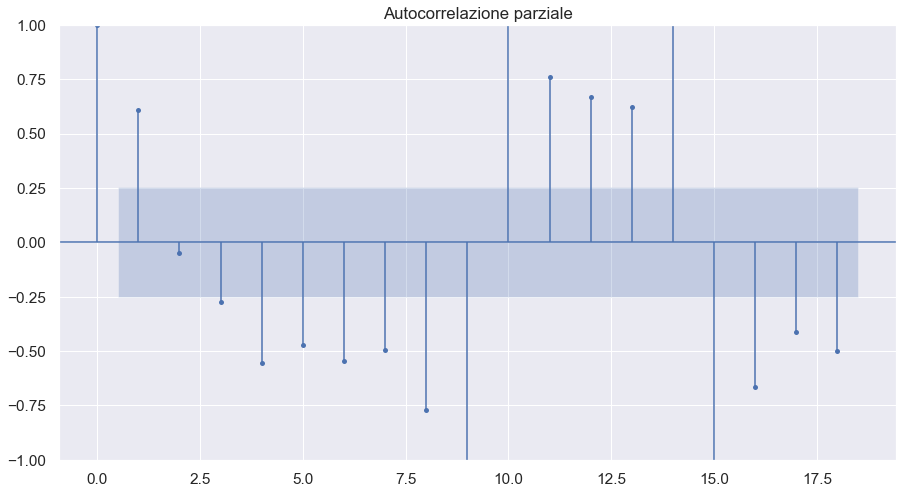

In [334]:
# Serie differenziata e grafici di autocorrelazione e autocorrelazione parziale
fig0 = plt.figure(figsize=(15,8))
ax0 = fig0.add_subplot()
endog.diff().dropna().plot(title="Serie differenziata", xlabel="Tempo", ax=ax0)

fig1 = plt.figure(figsize=(15,8))
ax1 = fig1.add_subplot()
plot_acf(endog.diff().dropna(), title="Autocorrelazione", ax=ax1)

fig2 = plt.figure(figsize=(15,8))
ax2 = fig2.add_subplot()
plot_pacf(endog.diff().dropna(), title="Autocorrelazione parziale", ax=ax2)

plt.show()

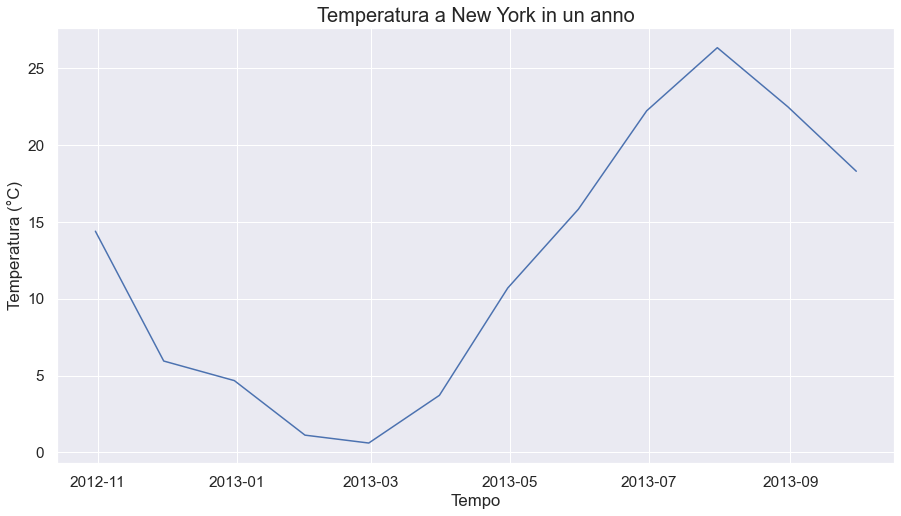

datetime
2012-10-31    14.390
2012-11-30     5.946
2012-12-31     4.673
2013-01-31     1.126
2013-02-28     0.613
2013-03-31     3.715
2013-04-30    10.694
2013-05-31    15.820
2013-06-30    22.222
2013-07-31    26.326
2013-08-31    22.476
2013-09-30    18.289
Freq: M, Name: New York, dtype: float64

In [335]:
# Serie stagionale
endog_stag = endog[:12]
plt.figure(figsize=(15,8))
plt.title("Temperatura a New York in un anno", fontsize = 20)
plt.xlabel('Tempo')
plt.ylabel('Temperatura (°C)')
plt.plot(months[:12], endog_stag)
plt.show()
endog_stag.head(12)

In [336]:
# ADF test sulla serie stagionale
result = adfuller(endog_stag)
print('ADF Statistic \t---> %f' % result[0])
print('p-value \t---> %f' % result[1])
if result[1] < 0.05:
    print('La serie è stazionaria')
else:
    print('La serie non è stazionaria')

ADF Statistic 	---> -4.718511
p-value 	---> 0.000078
La serie è stazionaria


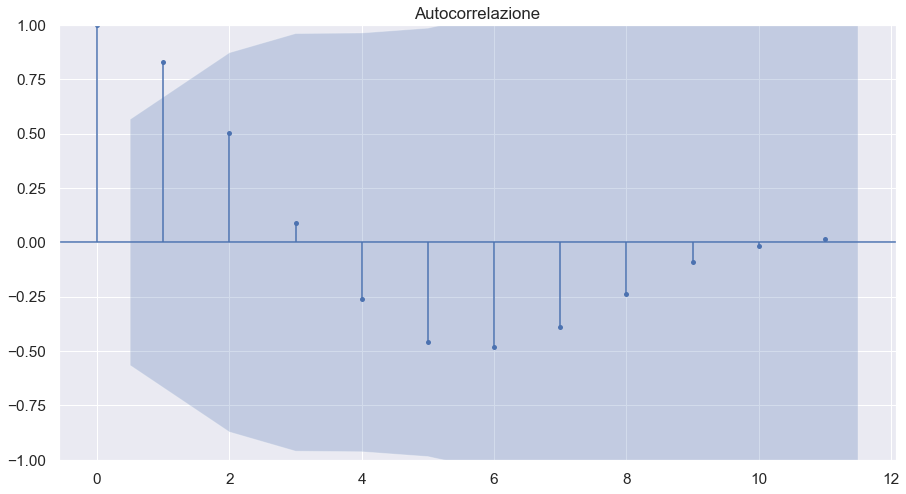

In [337]:
# Grafico di autocorrelazione
fig1 = plt.figure(figsize=(15,8))
ax1 = fig1.add_subplot()
plot_acf(endog_stag, title="Autocorrelazione",  ax=ax1)

plt.show()

In [338]:
# Costruisco il modello e stimo i parametri
mod = sm.tsa.ARIMA(endog, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
res = mod.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:                         New York   No. Observations:                   61
Model:             ARIMA(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -146.540
Date:                          Tue, 12 Apr 2022   AIC                            303.080
Time:                                  18:30:05   BIC                            313.551
Sample:                              10-31-2012   HQIC                           307.176
                                   - 10-31-2017                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5854      0.124      4.719      0.000       0.342       0.829
ma.L1         -0.9919      0.174     -5.714      0.000      -1.332      -0.652
ar.S.L12       0.9977      0.021     47.805      0.000       0.957       1.039
ma.S.L12      -0.8360      0.704     -1.188      0.235      -2.216       0.544
sigma2         4.5841      3.824      1.199      0.231      -2.911      12.079
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.89   Prob(JB):                         0.55
Heteroskedasticity (H):               1.56   Skew:                            -0.10
Prob(H) (two-sided):                  0.33   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

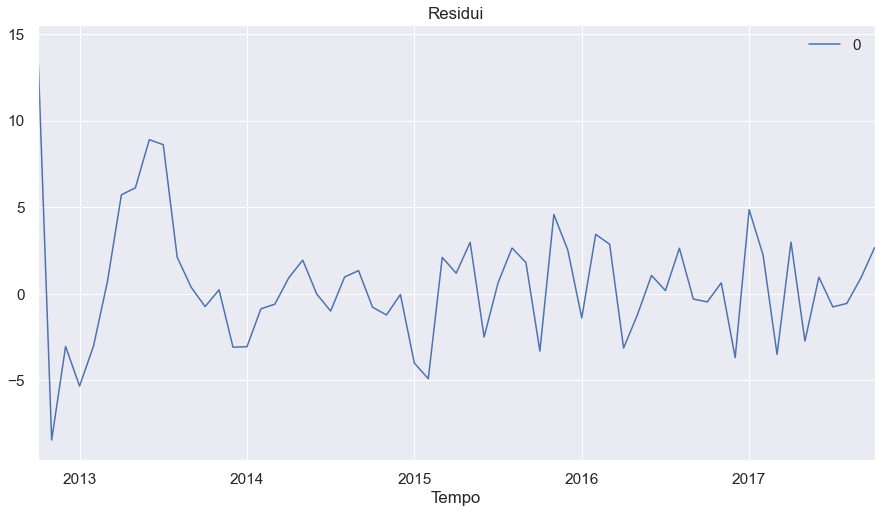

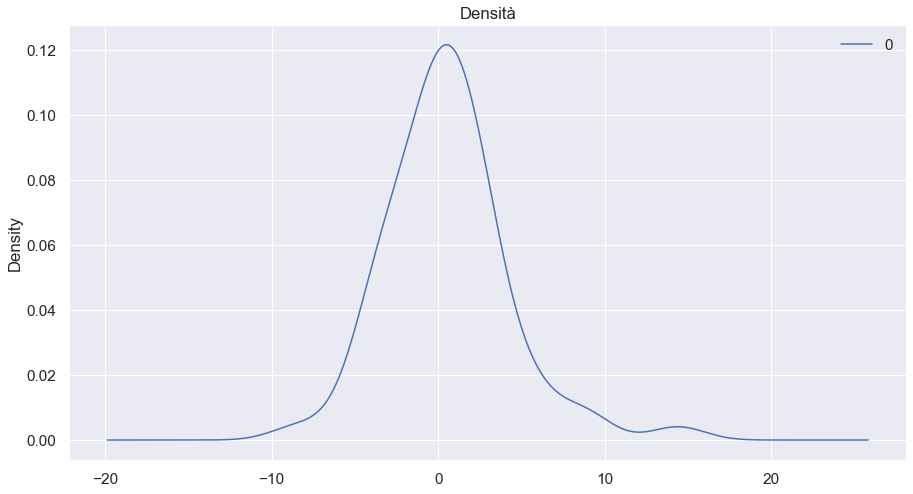

In [339]:
# Plot dei residui
residuals = pd.DataFrame(res.resid)

fig0 = plt.figure(figsize=(15,8))
ax0 = fig0.add_subplot()
residuals.plot(title="Residui", xlabel="Tempo", ax=ax0)

fig1 = plt.figure(figsize=(15,8))
ax1 = fig1.add_subplot()
residuals.plot(kind="kde", title="Densità", ax=ax1)

plt.show()

In [340]:
# Forecast
fcast_res = res.get_forecast('2018-06')
fcast_res.summary_frame()

New York,mean,mean_se,mean_ci_lower,mean_ci_upper
2017-11-30,9.822010,2.215467,5.479774,14.164245
2017-12-31,6.043403,2.590839,0.965453,11.121353
2018-01-31,0.999936,2.720834,-4.332801,6.332673
2018-02-28,0.802536,2.771784,-4.630061,6.235133
2018-03-31,4.627036,2.793785,-0.848683,10.102755
2018-04-30,11.638902,2.804367,6.142444,17.135361
2018-05-31,16.937580,2.810228,11.429633,22.445526
2018-06-30,21.697053,2.814181,16.181358,27.212747


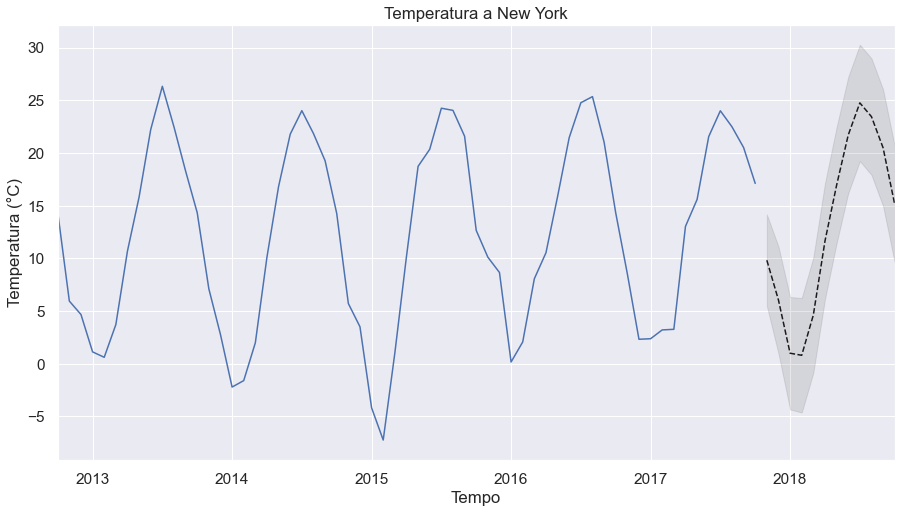

In [341]:
# Plot del forecast
fig, ax = plt.subplots(figsize=(15, 8))

endog.plot(title="Temperatura a New York", xlabel="Tempo", ylabel = "Temperatura (°C)", ax=ax)

fcast = res.get_forecast('2018-10').summary_frame()
fcast['mean'].plot(ax=ax, style='k--')
ax.fill_between(fcast.index, fcast['mean_ci_lower'], fcast['mean_ci_upper'], color='k', alpha=0.1);

In [342]:
# Previsioni con append
nforecasts = 7
forecasts = {}

nobs = len(endog)
n_init_training = int(nobs * 0.8)

# Si crea il modello iniziale
init_training_endog = endog.iloc[:n_init_training]
mod = sm.tsa.ARIMA(init_training_endog, order=(1, 1, 1), seasonal_order=(1,0,1,12))
res = mod.fit()

forecasts[init_training_endog.index[-1]] = res.forecast(steps=nforecasts)

# Si appende l'osservazione successiva lungo la serie
for t in range(n_init_training, nobs):
    updated_endog = endog.iloc[t:t+1]
    res = res.append(updated_endog, refit=False)
    forecasts[updated_endog.index[0]] = res.forecast(steps=nforecasts)

forecasts = pd.concat(forecasts, axis=1)

forecasts.iloc[:7, :7].head(7)

,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31
2016-10-31,13.743824,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,10.008789,10.695104,NaN,NaN,NaN,NaN,NaN
2016-12-31,8.283907,8.929096,6.351293,NaN,NaN,NaN,NaN
2017-01-31,1.336076,1.996484,-0.426756,-5.234057,NaN,NaN,NaN
2017-02-28,1.852897,2.507673,0.027240,-4.491801,4.588763,NaN,NaN
2017-03-31,7.376793,8.033653,5.574383,0.948676,9.484730,7.840521,NaN
2017-04-30,11.441418,12.097507,9.630405,5.044169,13.781710,12.236096,6.779292


In [343]:
# Costruisco gli errori di forecast
forecast_errors = forecasts.apply(lambda column: endog - column).reindex(forecasts.index)

forecast_errors.iloc[:7, :7].head(7)

,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31
2016-10-31,0.575176,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,-1.473789,-2.160104,NaN,NaN,NaN,NaN,NaN
2016-12-31,-5.960907,-6.606096,-4.028293,NaN,NaN,NaN,NaN
2017-01-31,1.038924,0.378516,2.801756,7.609057,NaN,NaN,NaN
2017-02-28,1.358103,0.703327,3.183760,7.702801,-1.377763,NaN,NaN
2017-03-31,-4.108793,-4.765653,-2.306383,2.319324,-6.216730,-4.572521,NaN
2017-04-30,1.590582,0.934493,3.401595,7.987831,-0.749710,0.795904,6.252708


In [344]:
# Errori di forecast per orizzonte anzichè per data
def flatten(column):
    return column.dropna().reset_index(drop=True)

flattened = forecast_errors.apply(flatten)
flattened.index = (flattened.index + 1).rename('Orizzonte')

flattened.iloc[:7, :7].head(7)

,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31
Orizzonte,,,,,,,
1,0.575176,-2.160104,-4.028293,7.609057,-1.377763,-4.572521,6.252708
2,-1.473789,-6.606096,2.801756,7.702801,-6.216730,0.795904,3.131327
3,-5.960907,0.378516,3.183760,2.319324,-0.749710,-1.998261,5.031095
4,1.038924,0.703327,-2.306383,7.987831,-3.580359,-0.219573,4.450958
5,1.358103,-4.765653,3.401595,5.082626,-1.788171,-0.754907,2.913046
6,-4.108793,0.934493,0.481784,6.902400,-2.328500,-2.309395,4.271991
7,1.590582,-1.982420,2.306961,6.351868,-3.881141,-0.944324,7.070218


In [345]:
# Root mean square error
rmse = (flattened**2).mean(axis=1)**0.5

rmse.head(7)

Orizzonte
1    3.738360
2    4.033164
3    3.041149
4    3.562219
5    3.436621
6    3.439473
7    4.106984
dtype: float64

In [346]:
# Previsioni con extend
nforecasts = 7
forecasts_ext = {}

nobs = len(endog)
n_init_training = int(nobs * 0.8)

# Si crea il modello iniziale
init_training_endog = endog.iloc[:n_init_training]
mod = sm.tsa.ARIMA(init_training_endog, order=(1, 1, 1), seasonal_order=(1, 0, 1, 12))
res = mod.fit()

forecasts_ext[init_training_endog.index[-1]] = res.forecast(steps=nforecasts)

# Si appende l'osservazione successiva lungo la serie
for t in range(n_init_training, nobs):
    updated_endog = endog.iloc[t:t+1]
    res = res.extend(updated_endog)
    forecasts_ext[updated_endog.index[0]] = res.forecast(steps=nforecasts)

forecasts_ext = pd.concat(forecasts_ext, axis=1)

forecasts_ext.iloc[:7, :7].head(7)

,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31
2016-10-31,13.743824,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,10.008789,10.695104,NaN,NaN,NaN,NaN,NaN
2016-12-31,8.283907,8.929096,6.351293,NaN,NaN,NaN,NaN
2017-01-31,1.336076,1.996484,-0.426756,-5.234057,NaN,NaN,NaN
2017-02-28,1.852897,2.507673,0.027240,-4.491801,4.588763,NaN,NaN
2017-03-31,7.376793,8.033653,5.574383,0.948676,9.484730,7.840521,NaN
2017-04-30,11.441418,12.097507,9.630405,5.044169,13.781710,12.236096,6.779292


In [347]:
# Costruisco gli errori di forecast
forecast_ext_errors = forecasts_ext.apply(lambda column: endog - column).reindex(forecasts_ext.index)

forecast_ext_errors.iloc[:7, :7].head(7)

,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31
2016-10-31,0.575176,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-30,-1.473789,-2.160104,NaN,NaN,NaN,NaN,NaN
2016-12-31,-5.960907,-6.606096,-4.028293,NaN,NaN,NaN,NaN
2017-01-31,1.038924,0.378516,2.801756,7.609057,NaN,NaN,NaN
2017-02-28,1.358103,0.703327,3.183760,7.702801,-1.377763,NaN,NaN
2017-03-31,-4.108793,-4.765653,-2.306383,2.319324,-6.216730,-4.572521,NaN
2017-04-30,1.590582,0.934493,3.401595,7.987831,-0.749710,0.795904,6.252708


In [348]:
# Errori di forecast per orizzonte anzichè per data
flattened_ext = forecast_ext_errors.apply(flatten)
flattened_ext.index = (flattened_ext.index + 1).rename('Orizzonte')

flattened_ext.iloc[:7, :7].head(7)

,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31
Orizzonte,,,,,,,
1,0.575176,-2.160104,-4.028293,7.609057,-1.377763,-4.572521,6.252708
2,-1.473789,-6.606096,2.801756,7.702801,-6.216730,0.795904,3.131327
3,-5.960907,0.378516,3.183760,2.319324,-0.749710,-1.998261,5.031095
4,1.038924,0.703327,-2.306383,7.987831,-3.580359,-0.219573,4.450958
5,1.358103,-4.765653,3.401595,5.082626,-1.788171,-0.754907,2.913046
6,-4.108793,0.934493,0.481784,6.902400,-2.328500,-2.309395,4.271991
7,1.590582,-1.982420,2.306961,6.351868,-3.881141,-0.944324,7.070218


In [349]:
# Root mean square error
rmse_ext = (flattened**2).mean(axis=1)**0.5

data = {'Append': rmse, 'Extend': rmse_ext}
rmse_all = pd.DataFrame(data=data, index=[1,2,3,4,5,6,7])

rmse_all.head(7)

,Append,Extend
1,3.738360,3.738360
2,4.033164,4.033164
3,3.041149,3.041149
4,3.562219,3.562219
5,3.436621,3.436621
6,3.439473,3.439473
7,4.106984,4.106984
